# Банки — Сегментация пользователей по потреблению

## Описание проекта
Мы работаем в региональном банке "Метанпром". Необходимо проанализировать клиентов регионального банка и сегментировать пользователей по количеству потребляемых продуктов, обращая особое внимание на отток.

### Описание данных
Путь к файлу: https://code.s3.yandex.net/datasets/bank_scrooge.csv

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- USERID — идентификатор пользователя,
- score — баллы кредитного скоринга,
- city — город,
- gender — пол,
- age — возраст,
- equity — количество баллов собственности
- balance — баланс на счёте,
- products — количество продуктов, которыми пользуется клиент,
- credit_card — есть ли кредитная карта,
- last_activity — активный клиент,
- EST_SALARY — оценочный доход клиента,
- сhurn — признак оттока.

По итогам исследования подготовьте презентацию. Для создания презентации
используйте любой удобный инструмент, но отправить презентацию
нужно обязательно в формате pdf.

### Декомпозиция (Шаги по выполению проекта)

#### Откроем файл и изучим общую информацию
- откроем файл и сохраним в переменную
- изучим общую информацию датафрейма

#### Проведём предобработку данных
- проверим природу пропусков в данных если таковы имеются
- приведём наименование столбцов к единому "змеиному" стилю
- проверим наш датафрейм на наличие явных и неявных дубликатов. При их наличии посмотрим, что это за дубликаты и решим удалять их или же оставить
- изменим тип данных в столбцах при необходимости
- сделаем кодирование признаков

#### Исследовательский анализ данных
- исследование распределений признаков
- исследование распределений признаков в разрезе оттока клиентов банка
- корреляционный анализ

#### Проверка гипотез
- сформулируем статистические гипотезы
- выберем и обоснуем статистические критерии
- проверим гипотезы и интерпретируем результаты
    
#### Промежуточный итог
Написание промежуточных итогов по изучению исследовательского анализа и проверки гипотез

#### Сегментация на основе выделенных показателей
- сегментируем клиентов банка на основе исследовательского анализа данных
- рассчитаем для каждого сегмента:
    - размер сегмента
    - долю оттока
    - описательные характеристики клиентов

#### Выводы и рекомендации
- предоставим выводы и рекомендации в формате презентации

## Открытие файла и изучение общей информации

In [1]:
# импортируем все необходимые библиотеки для исследования
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
!pip install phik
import phik
from phik import resources, report

In [2]:
# прочитаем наш датафрейм и сохраним в переменную
df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

In [3]:
# создадим функцию для быстрого просмотра всей нужной информации нашего датафрейма
def display_and_info(df):
    display(df.head())
    display(df.info())
    display(df.describe())

In [4]:
display_and_info(df)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Вывод по разделу:
Изучили файл 
- обнаружили пропуски в двух столбцах 'age' и 'balance'
К сожалению заполнить их никак не получится т.к. возраст клиента и его баланс на счёте индивидуален. Оставляем как есть
- некорректное наименование двух столбцов 'USERID' и 'EST_SALARY'. Исправим это
- необходимо поменять тип данных в двух столбцах 'score' и 'age' с float на int, т.к. баллы кредитного скоринга и возраст клиентов указан в датафрейме в виде целых чисел

## Предобработка данных

### Посмотрим на количество пропусков в датафрейме

In [5]:
# смотрим на пропуски в датафрейме по столбцах
df.isna().sum()

USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

Пропуски имеются всего в 2 столбцах:
- столбец 'age' - 26 пропусков (0,26 % от все данных)
- столбец 'balance' - 2295 пропуска (22,95% от всех данных)

Считаю, что можно удалить пропуски из столбца с возрастом клиента, т.к. грубо говоря четверть 1% данных не повлияют на наше исследование. Пропуски в столбце с балансом не удаляем и заменить также не может. Необходимо понять природу появления данных пропусков. Сравним разницу числового описания данных нашего полного датафрейма с числовым описанием данных пропусков в столбце с балансом

In [6]:
# выведем оба числовых описания данных
display(df[df['balance'].isna()].describe())
display(df.describe())

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,2295.000000,2295.000000,2279.000000,2295.000000,0.0,2295.000000,2295.000000,2295.000000,2.295000e+03,2295.000000
mean,172069.447930,865.352070,42.093023,0.050980,NaN,1.162092,0.815686,0.549455,2.263102e+05,0.005664
std,33337.084589,89.603091,11.941551,0.225872,NaN,0.402532,0.387824,0.497657,1.997718e+05,0.075066
min,114182.000000,642.000000,18.000000,0.000000,NaN,0.000000,0.000000,0.000000,2.027403e+04,0.000000
25%,143095.500000,871.000000,33.000000,0.000000,NaN,1.000000,1.000000,0.000000,1.203477e+05,0.000000
50%,172659.000000,903.000000,40.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.741607e+05,0.000000
75%,201551.000000,922.000000,49.000000,0.000000,NaN,1.000000,1.000000,1.000000,2.400150e+05,0.000000
max,229145.000000,990.000000,86.000000,3.000000,NaN,3.000000,1.000000,1.000000,1.333687e+06,1.000000


,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


По сравнению описаний числовых данных можно увидеть, что у клиентов с пропусками баланса:
- средние баллы кредитного скоринга чуть выше чем в среднем по датафрейму, 865 и 848 соответственно
- средний возраст клиентов практически не отличается от среднего по датафрейму (42,09 и 42,73 лет)
- среднийбаллов собственности гораздо меньше, среднее 0,05 в отличии от среднего по датафрейму - 2,62, а максимальное количество баллов всего 1, когда по датафрейму 9
- количество продуктов которыми они пользуются значительно меньше, в среднем 1,16 продукта. В датафрейме среднее 1,87
- наличие кредитной карты больше чем в среднем по датафрейму, 0,81 и 0,68 соответственно
- чуть выше среднее количество активных клиентов, почти 0,55, а по датафрейму - 0,52
- средний оценочный доход значительно выше чем по датафрейму и составляет чуть больше 226 тысяч рублей. Средний оценочный доход по датафрейму составляет чуть меньше 148 тысяч рублей
- отток в десятки раз ниже чем по датафрейму (примерно 0,13% (2295*0,005664/100=0,1299%) и 18,2% соответственно)

Исходя из анализа описаний числовых данных, можно сделать вывод, что пропуски случайны, т.е. нет чёткой взаимосвязи по всем столбцам (где-то средний показатель выше, а где-то ниже). Следовательно пропуски оставляем. Скорее всего они появились при выгрузке данных, т.к. балансы клиентов уж точно должны быть известны в банке в отличии от того же оценочного дохода клиента который скорее всего получается путём приёма справок о заработной плате и ещё каких-либо видах дохода (задокументированных и нет, допустим сдача квартиры)

In [7]:
# удаляем пропуски из столбца с возрастом клиентов
df = df.dropna(subset=['age'])
# проверим ещё раз количество пропусков в датафрейме по столбцам
df.isna().sum()

USERID              0
score               0
city                0
gender              0
age                 0
equity              0
balance          2279
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

### Приведём наименование столбцов к единому стилю

In [8]:
# заменим наименования столбцов на удобные для чтения
df = df.rename(columns={'USERID': 'user_id', 'EST_SALARY': 'est_salary'})
# проверяем наименования столбцов
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


### Проверим датафрейм на дубликаты

In [9]:
# проверим на явные дубликаты
df.duplicated().sum()

0

In [10]:
# теперь проверим наш датафрейм на наличие неявных дубликатов
df.groupby('user_id')['score'].value_counts().sort_values()

user_id  score
94561    838.0    1
190780   867.0    1
190792   911.0    1
190822   801.0    1
190827   831.0    1
                 ..
152639   932.0    1
152649   796.0    1
152651   844.0    1
152527   823.0    1
229145   698.0    1
Name: score, Length: 9974, dtype: int64

Дубликатов не обнаружено

In [11]:
# также проверим дубликаты только по столбцу 'user_id'
df.duplicated(subset=['user_id']).sum()

50

In [12]:
# посмотрим на первые 5 строк таблицы дубликатов по 'user_id'
df[df['user_id'].duplicated()].head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1583,190253,726.0,Ярославль,М,49.0,0,NaN,1,1,1,177700.78,0
1837,210662,896.0,Рыбинск,Ж,37.0,0,NaN,2,0,0,90916.04,0
2138,131419,739.0,Рыбинск,Ж,37.0,3,1307941.65,3,0,0,103867.47,0
2302,220816,934.0,Рыбинск,Ж,74.0,5,1294285.39,3,1,0,95606.80,0
2998,208081,821.0,Рыбинск,Ж,62.0,3,493608.26,2,1,1,33491.45,0


In [13]:
# посмотрим первых трёх клиентов банка которые имеют дубликаты по 'user_id'
display(df.query('user_id == 190253'))
display(df.query('user_id == 210662'))
display(df.query('user_id == 131419'))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
231,190253,823.0,Рыбинск,М,37.0,4,373348.39,2,0,1,131947.92,1
1583,190253,726.0,Ярославль,М,49.0,0,NaN,1,1,1,177700.78,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
869,210662,962.0,Ярославль,Ж,54.0,5,5069231.39,1,1,1,955144.85,1
1837,210662,896.0,Рыбинск,Ж,37.0,0,NaN,2,0,0,90916.04,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
904,131419,934.0,Ярославль,М,35.0,5,2348335.95,2,0,0,217105.13,1
2138,131419,739.0,Рыбинск,Ж,37.0,3,1307941.65,3,0,0,103867.47,0


Получается это всё разные клиенты банка находящиеся в разных городах. Скорее всего такое произошло, что хоть банк один и тотже, но у каждого филиала своя клиентская база, не общая по другому говоря. Соответственно в каждом филиале по своим критериям присуждают идентификационный номер клиента, т.е. в нашем случае - 'user_id'. Проверим на свякий случай ещё неявные дубликаты по 'user_id' и 'city'

In [14]:
df.duplicated(subset=['user_id', 'city']).sum()

0

### Изменим типы данных

Необходимо поменять типы данных в двух столбцах - 'score' и 'age'. Из-за пропусков в столбце с возрастом мы к сожалению не сможем поменять тип данных. Заменим значит только в столбце с баллами кредитного скоринга на 'int64'

In [15]:
# изменим тип данных в столбце с баллами кредитного скоринга
df[['score', 'age']] = df[['score', 'age']].astype('int64')
# проверим типы данных вновь
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   int64  
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int64  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1013.0+ KB


In [16]:
df.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9974.000000,9974.000000,9974.000000,9974.000000,7.695000e+03,9974.000000,9974.000000,9974.000000,9.974000e+03,9974.000000
mean,171755.218669,848.682575,42.734409,2.630840,8.272456e+05,1.871466,0.680168,0.522859,1.477868e+05,0.182374
std,33695.527126,65.399720,12.179971,1.979965,1.980327e+06,0.792729,0.466435,0.499502,1.392855e+05,0.386172
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142760.000000,802.000000,33.000000,0.000000,2.956987e+05,1.000000,0.000000,0.000000,7.525166e+04,0.000000
50%,172643.000000,853.000000,40.000000,3.000000,5.242953e+05,2.000000,1.000000,1.000000,1.196268e+05,0.000000
75%,201163.750000,900.000000,51.000000,4.000000,9.800512e+05,2.000000,1.000000,1.000000,1.744998e+05,0.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


### Сделаем кодирование признаков

#### Заменим в столбце с гендером значения "М" на 1, а значение "Ж" на 0

In [17]:
# переименуем значения в столбце 'gender'
df = df.replace({'gender':{'М': '1', 'Ж': '0'}})

In [18]:
# проверим наш датафрейм
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850,Рыбинск,0,25,1,59214.82,2,0,1,75719.14,1
1,146556,861,Рыбинск,0,37,5,850594.33,3,1,0,86621.77,0
2,120722,892,Рыбинск,0,30,0,NaN,1,1,1,107683.34,0
3,225363,866,Ярославль,0,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730,Ярославль,1,34,5,174.00,1,1,0,67353.16,1


#### Создадим столбцы с наименованием городов откуда клиенты

In [19]:
# создадим три столбца в которых будет хранится информация о том из какого города клиент банка
df['Ростов'] = df['city'] == 'Ростов'
df['Рыбинск'] = df['city'] == 'Рыбинск'
df['Ярославль'] = df['city'] == 'Ярославль'

In [20]:
# проверим типы данных в новых столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   int64  
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int64  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
 12  Ростов         9974 non-null   bool   
 13  Рыбинск        9974 non-null   bool   
 14  Ярославль      9974 non-null   bool   
dtypes: bool(3), float64(2), int64(8), object(2)
memory usage: 1.0+ MB


Созданные нами 3 столбца имеют булевый тип данных, а значит если клиент проживает допустим в Ярославле, то в столбце 'Ярославль' будет стоять 'True', а в столбцах 'Ростов' и 'Рыбинск' будет стоять 'False'.

В данных трёх столбцах также сделаем кодирование признаков простым путём смены типа данных на 'int64'. В таком случае 'True' будет равен 1, а 'False' = 0

In [21]:
# изменим типы данных в трёх столбцах
df[['Ростов', 'Рыбинск', 'Ярославль']] = df[['Ростов', 'Рыбинск', 'Ярославль']].astype('int64')

In [22]:
# посмотрим на первые 10 строк нашего датафрейма
df.head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль
0,183012,850,Рыбинск,0,25,1,59214.82,2,0,1,75719.14,1,0,1,0
1,146556,861,Рыбинск,0,37,5,850594.33,3,1,0,86621.77,0,0,1,0
2,120722,892,Рыбинск,0,30,0,NaN,1,1,1,107683.34,0,0,1,0
3,225363,866,Ярославль,0,51,5,1524746.26,2,0,1,174423.53,1,0,0,1
4,157978,730,Ярославль,1,34,5,174.00,1,1,0,67353.16,1,0,0,1
5,202305,856,Рыбинск,1,56,4,863687.24,3,1,0,156619.80,0,0,1,0
6,177259,807,Ярославль,0,39,3,405042.44,3,0,1,103838.32,0,0,0,1
7,218868,825,Ярославль,0,38,4,458145.40,2,1,1,68085.48,0,0,0,1
8,211686,923,Ярославль,1,54,5,1206337.87,2,1,0,155371.79,0,0,0,1
9,133130,906,Ярославль,0,67,0,NaN,1,0,1,238055.53,0,0,0,1


Выводы по разделу:
- Нашли пропуски в двух столбцах. Удалили пропуски только в столбце с возрастом, т.к. их было четверть 1% и они не повлияют на наше исследование. Пропуски в столбце с балансом клиента не удаляли, т.к. их больше 20%, а заменить их не можем по причине, что баланс каждого клиента сугубо индивидуален
- Заменини наименование в двух столбцах и привели к "змеиному" стилю
- Проверили на наличие дубликатов. Явных и неявных дубликатов не обнаружено
- Изменили тип данных в столбцах с баллами кредитного скоринга и с возрастом
- Произвели кодирование признаков:
    - заменили "М" и "Ж" в столбце 'gender' на 1 и 0 соответственно
    - создали 3 новых столбца с указанием из какого города клиент банка

## Исследовательский анализ данных

### Исследование распределений признаков

#### Посмотрим на распределение баллов кредитного скоринга

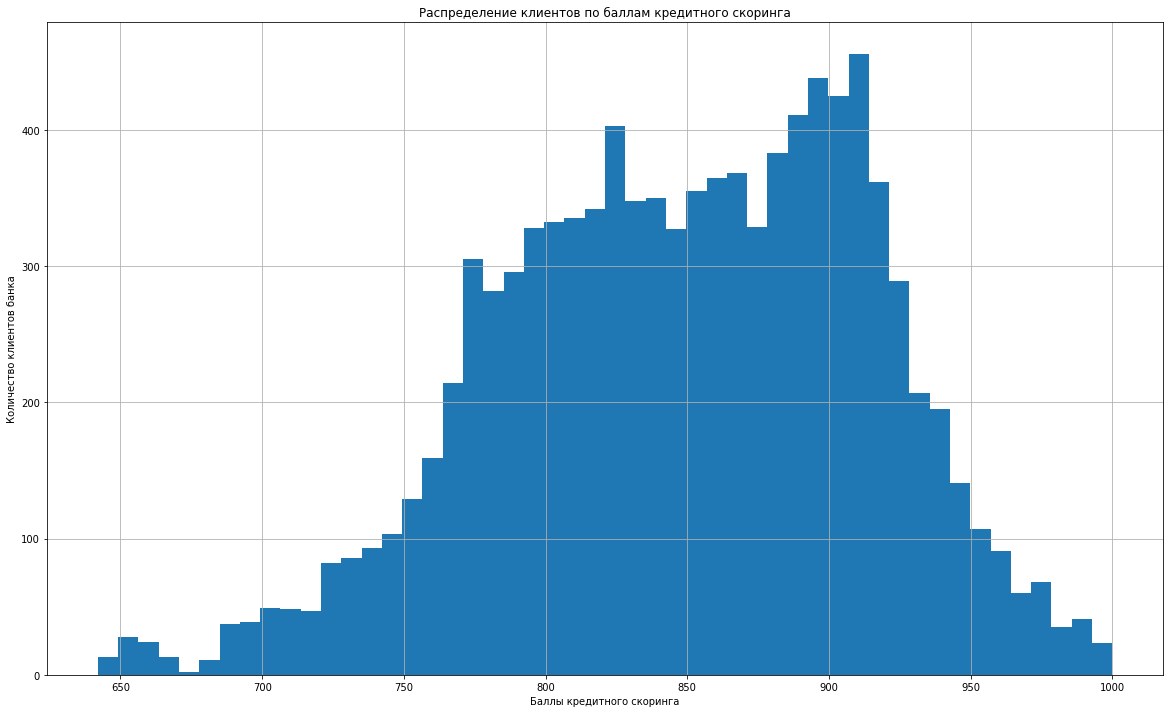

In [23]:
# строим гистограмму по баллам кредитного скоринга
df['score'].plot(kind='hist', bins=50, figsize=(20, 12), grid=True)
plt.title('Распределение клиентов по баллам кредитного скоринга')
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Количество клиентов банка')
plt.show()

Основная масса клиентов банка имеет баллы кредитного скоринга в диапазоне от 790 до 920. Пик приходится примерно на 915 баллов

#### Посмотрим как клиенты банка распределены по городам

In [24]:
# построим сводную таблицу для отображения количества клиентов из разных городов
users_city = df.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='city', ascending=False)
users_city

,user_id
city,
Ярославль,5875
Рыбинск,2683
Ростов,1416


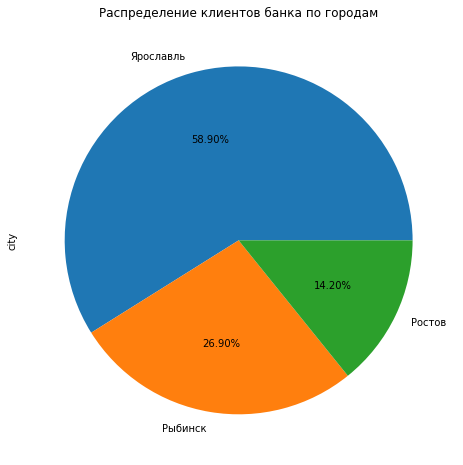

In [25]:
# посмотрим на процентное соотношение клиентов банка на круговой диаграмме
df['city'].value_counts().plot(
    kind = 'pie',
    autopct = '%1.2f%%',
    figsize=(8,8), 
    title = 'Распределение клиентов банка по городам');

Больше половины клиентов банка из Ярославля, их 5875 человек или 58,90% от всех клиентов. Далее идёт Рыбинск с количеством 2683 клиента (26,90%) и меньше всего из Ростова, всего 1416 клиентов (14,20% от всех клиентов)

#### Посмотрим на соотношение пола клиента

In [26]:
# построим сводную таблицу для того чтобы увидеть конкретное количество мужчин и женщин среди клиентов банка
users_gender = df.pivot_table(index='gender', values='user_id', aggfunc='count').sort_values(by='gender', ascending=False)
users_gender

,user_id
gender,
1,4991
0,4983


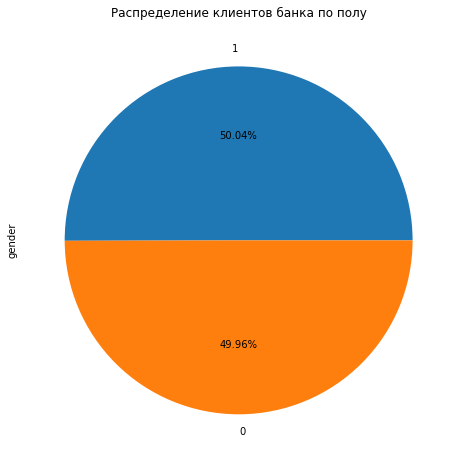

In [27]:
# посмотрим на процентное соотношение клиентов банка по гендеру на круговой диаграмме
df['gender'].value_counts().plot(
    kind = 'pie',
    autopct = '%1.2f%%',
    figsize=(8,8), 
    title = 'Распределение клиентов банка по полу')
plt.show();

Мужчин и женщин среди клиентов банка в целом одинаковое количество. Мужчин 4991 и это 50,04% от всех клиентов, а женщин 4983 или 49,96%. Посмотрим на гендерное распределение по городам

In [28]:
# создадим переменную в которой сгруппируем количество клиентов банка по полу и городам
gender_by_city = df.groupby('gender').agg({'Ярославль': 'sum','Рыбинск': 'sum', 'Ростов': 'sum'}
                               ).sort_values(by='gender', ascending=False).reset_index()
gender_by_city

,gender,Ярославль,Рыбинск,Ростов
0,1,2999,1309,683
1,0,2876,1374,733


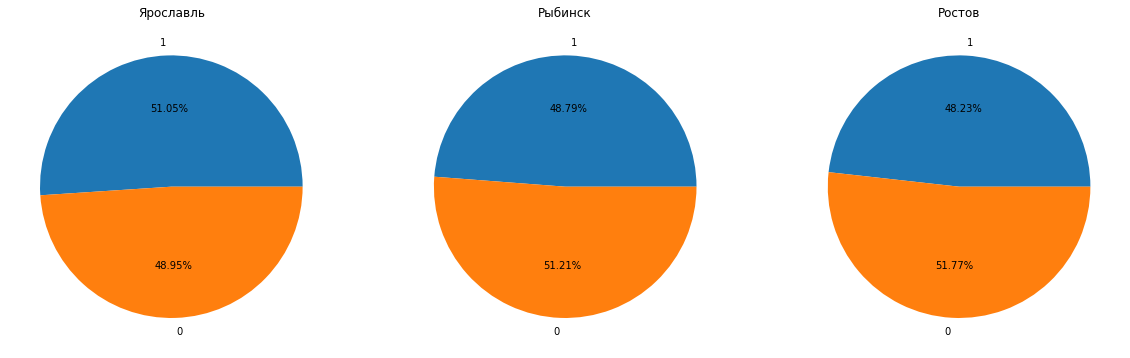

In [29]:
# построим три круговые диаграммы для каждого города с распределением по полу
fig, axs = plt.subplots(nrows= 1, ncols= 3, figsize=(20,20))
axs[0].pie(gender_by_city['Ярославль'], labels=gender_by_city['gender'], autopct='%1.2f%%')
axs[0].set_title('Ярославль')
axs[1].pie(gender_by_city['Рыбинск'], labels=gender_by_city['gender'], autopct='%1.2f%%')
axs[1].set_title('Рыбинск')
axs[2].pie(gender_by_city['Ростов'], labels=gender_by_city['gender'], autopct='%1.2f%%')
axs[2].set_title('Ростов')
plt.show();

В разрезе по городам немного иная ситуация. В Ярославле всё также небольшое доминирование мужчин по количеству. Здесь их 2999 мужчин (51,05%), а женщин 2876 (48,95%). А вот в Рыбинске и Ростове наоборот, женщин немного больше чем мужчин. В Рыбинске женщин 1374 (51,21%), а мужчин 1309 (48,79%). В Ростове ещё даже чуть больше женщин, их тут 733 (51,77%), а мужчин 683 (48,23%)

#### Посмотрим на возраст клиентов банка

Минимальное и максимальное значение возраста у нас в датафрейме от 18 до 86 лет (исходя из общей числовой информации) и получается разница между минимальным и максимальным значением возраста составляет 68 лет. Значит будем строить гистограмму с количеством корзин равным разнице в 68 лет, чтобы корзина была равна 1 году возраста клиента банка

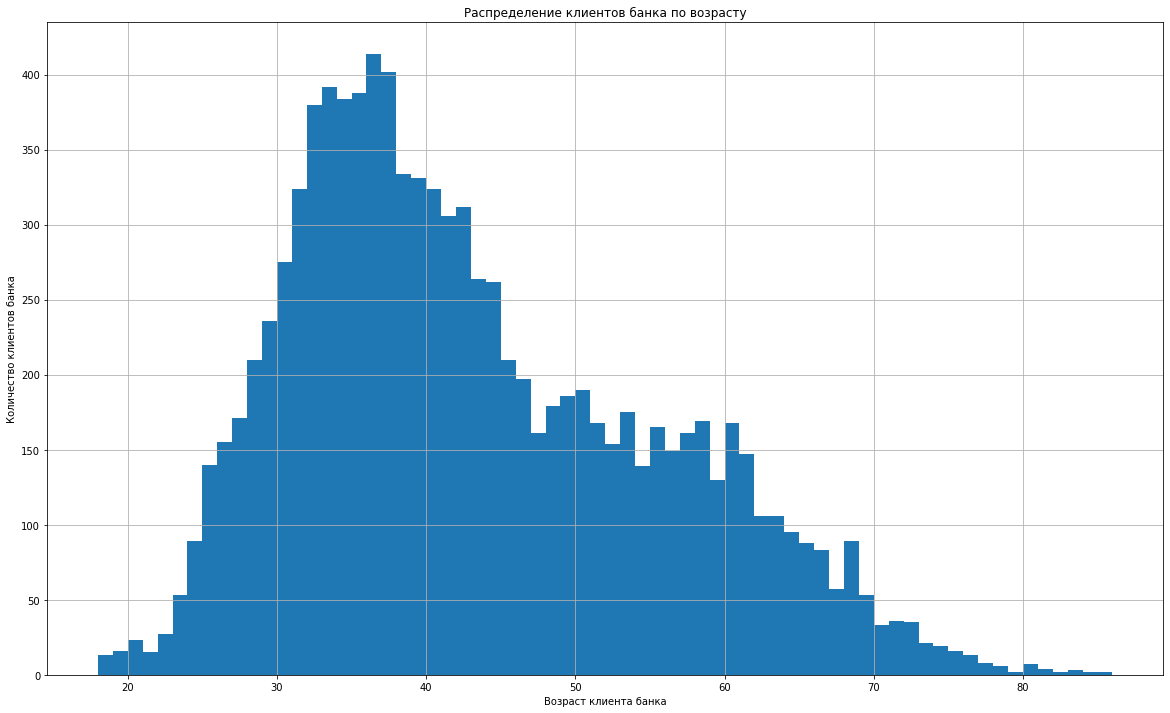

In [30]:
# строим гистограмму возраста клиентов банка
df['age'].plot(kind='hist', bins=68, figsize=(20, 12), grid=True)
plt.title('Распределение клиентов банка по возрасту')
plt.xlabel('Возраст клиента банка')
plt.ylabel('Количество клиентов банка')
plt.show()

Пик количества клиентов банка приходится на возраст 37 лет (это легко увидеть, т.к. 1 корзина равна 1 году). В целом большинство клиентов банка имеют средний возраст от 31 до 43 лет. Меньше всего клиентов банка в возрасте от 18 до 23 лет и от 70 и до 86 лет соответственно

#### Посмотрим на распределение количества баллов собственности

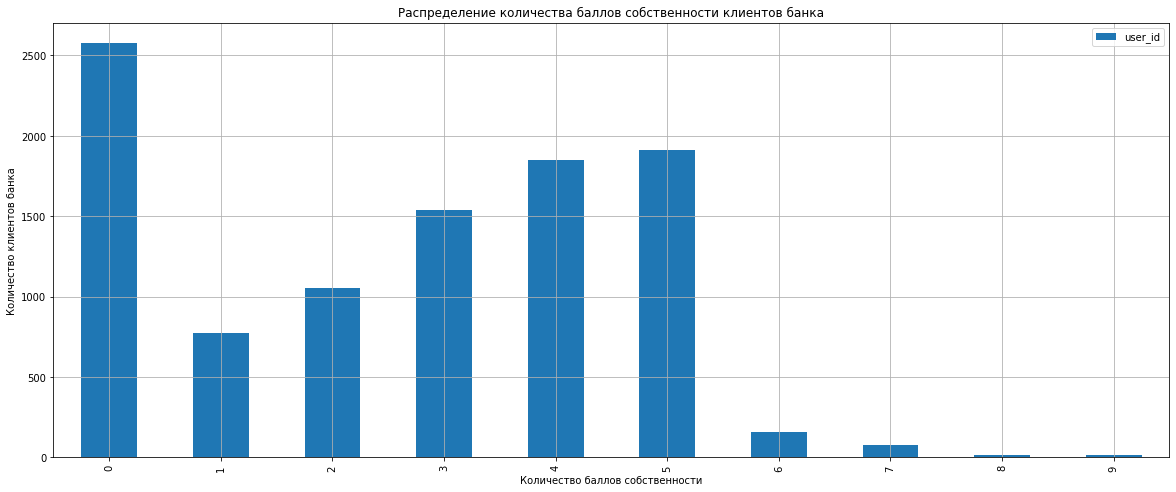

In [31]:
# построим столбчатую диаграмму распределения количества баллов собственности клиентов банка
df.pivot_table(index='equity', values='user_id', aggfunc='count').plot(kind='bar', figsize=(20, 8), grid=True)
plt.title('Распределение количества баллов собственности клиентов банка')
plt.xlabel('Количество баллов собственности')
plt.ylabel('Количество клиентов банка')
plt.show()

Больше всего клиентов банка не имеют баллов собственности вообще. Далее идёт небольшой рост от 1 балла до 5 и резкий спад после. Посмотрим на количество клиентов по каждому баллу собственности

In [32]:
# построим сводную таблицу для отображения количества клиентов по баллам собственности
users_equity = df.pivot_table(index='equity', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False)
# создадим столбец с указанием процентов количества клиентов по каждому баллу собственности от общего количества клиентов
users_equity['percent'] = round(users_equity['user_id']/df['equity'].count()*100, 2)
users_equity

,user_id,percent
equity,,
0,2576,25.83
5,1915,19.20
4,1847,18.52
3,1541,15.45
2,1051,10.54
1,773,7.75
6,161,1.61
7,80,0.80
8,17,0.17


Больше 25% клиентов банка не имеют баллов собственности. Больше всего (если небрать 0 баллов) клиентов банка имеют 5 баллов собственности, таких 1915 человек (19,20%). Меньше всего клиентов банка имеют 9 баллов собственности, таких 13 клиентов банка (0,13%)

#### Посмотрим на распределение баланса клиентов банка

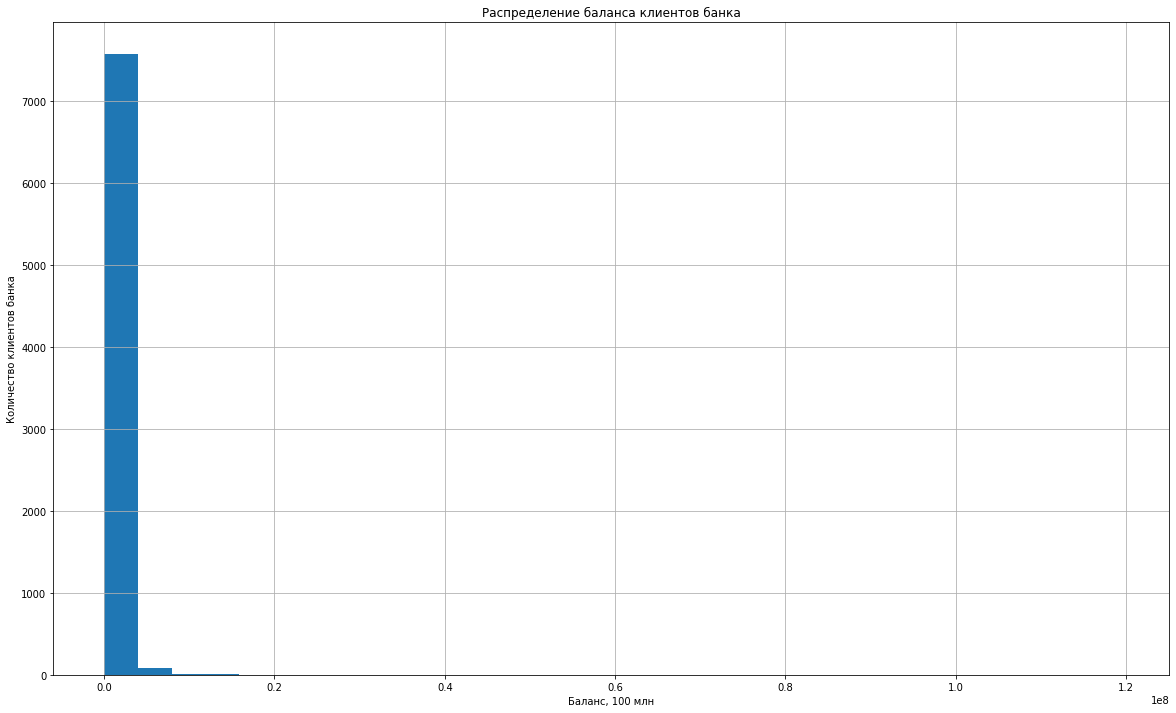

In [33]:
# построим гистограмму баланса клиентов банка
df['balance'].plot(kind='hist', bins=30, figsize=(20, 12), grid=True)
plt.title('Распределение баланса клиентов банка')
plt.xlabel('Баланс, 100 млн')
plt.ylabel('Количество клиентов банка')
plt.show()

Основная часть лежит в пределах примерно 4-5 млн рублей. Чтобы более точно указать верхний предел для построения гистограммы, прибегнем к подсчёту верхней границы диаграммы размаха, но чтобы не строить её саму, высчитаем значение которое будет равно 3му квартилю + 1,5 межквартильного размаха

In [34]:
# вводим значение межквартильного размаха
q1 = df['balance'].quantile(.25)
q3 = df['balance'].quantile(.75)
iqr = q3 - q1
# ищем максимальное значение межквартильного размаха от третьего квартиля (Q3)
print(q3 + 1.5 * iqr)

2006579.9649999999


Если не брать копейки, то можно сказать, что это число будет 2006580 рублей

In [35]:
# удаляем клиентов банка с балансом выше 2006580 рублей (удаляем не из датафрейма, а только для построения гистограммы)
users_balance = df.query('balance < 2006580')

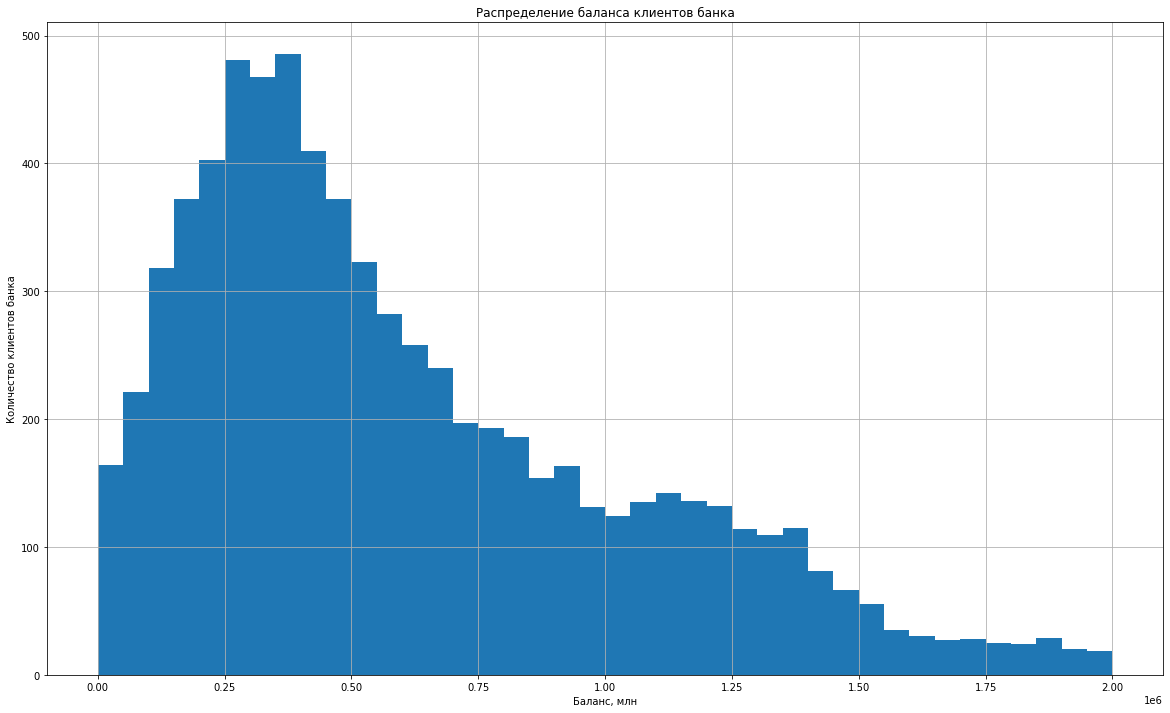

In [36]:
# строим гистограмму баланса клиентов банка
users_balance['balance'].plot(kind='hist', bins=40, figsize=(20, 12), grid=True)
plt.title('Распределение баланса клиентов банка')
plt.xlabel('Баланс, млн')
plt.ylabel('Количество клиентов банка')
plt.show()

Большинство клиентов банка имеют баланс в размере от 200000 до 400000 рублей с двумя пиками в размере 250000 и 350000 рублей

#### Посмотрим на распределение количества продуктов банка

In [37]:
# построим сводную таблицу для отображения количества продуктов банка у клиентов
users_count_products = df.pivot_table(index='products', values='user_id', aggfunc='count'
                                     ).sort_values(by='user_id', ascending=False)
users_count_products

,user_id
products,
2,5119
1,3323
3,1038
4,474
5,19
0,1


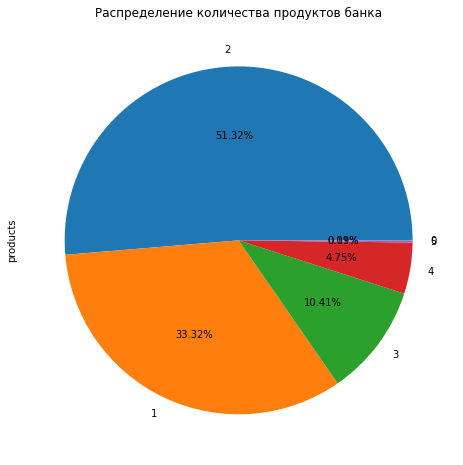

In [38]:
# посмотрим на распределение количества продуктов банка
df['products'].value_counts().plot(
    kind = 'pie',
    autopct = '%1.2f%%',
    figsize=(8,8), 
    title = 'Распределение количества продуктов банка');

Больше половины клиентов банка пользуются двумя продуктами (51,32%), треть клиентов пользуется хотя бы одним продуктом (33,32%). Трёмя продуктами пользуется только каждый 10 клиент банка (10,41%). Почти каждый 20 клиент использует 4 продукта (4,75%). Пятью продуктами пользуются только 19 клиентов (0,19%) и есть 1 клиент который не пользуется вообще ни одним продуктом банка

#### Посмотрим на количество клиентов банка которые имеют кредитные карты

In [39]:
# создадим свобную таблицу по наличию кредитной карты
users_credit_card = df.pivot_table(index='credit_card', values='user_id', aggfunc='count'
                                     ).sort_values(by='user_id', ascending=False)
users_credit_card

,user_id
credit_card,
1,6784
0,3190


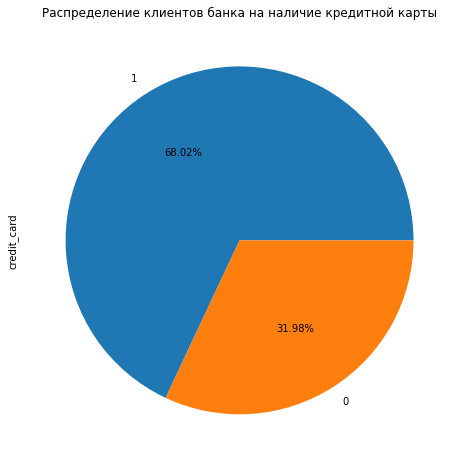

In [40]:
# посмотрим на распределение клиентов банка на наличие кредитной карты
df['credit_card'].value_counts().plot(
    kind = 'pie',
    autopct = '%1.2f%%',
    figsize=(8,8), 
    title = 'Распределение клиентов банка на наличие кредитной карты');

Больше 68% клиентов банка имеют кредитную карту, а именно 6784 клиента. 3190 клиента банка не имеют кредитной карты (31,98%)

#### Посмотрим на распределение активных клиентов банка и неактивных

In [41]:
# посмотрим на сводную таблицу количества активных клиентов банка
users_active = df.pivot_table(index='last_activity', values='user_id', aggfunc='count'
                                     ).sort_values(by='user_id', ascending=False)
users_active

,user_id
last_activity,
1,5215
0,4759


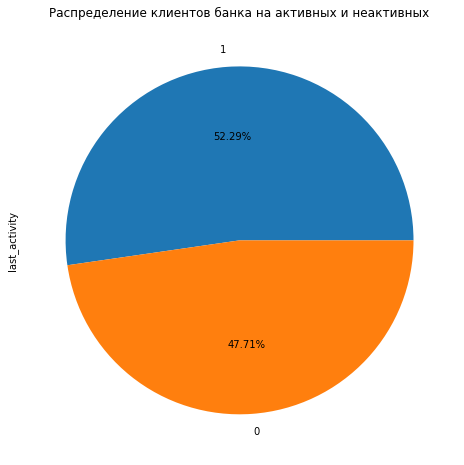

In [42]:
# посмотрим на распределение клиентов банка на активных и неактивных
df['last_activity'].value_counts().plot(
    kind = 'pie',
    autopct = '%1.2f%%',
    figsize=(8,8), 
    title = 'Распределение клиентов банка на активных и неактивных');

Активных клиентов банка немного больше, их насчитывается 5215 человек или 52,29% от общего числа клиентов банка. Не активных немного меньше - 4759 человек (47,71%)

#### Посмотрим на распределение оценочного дохода клиентов

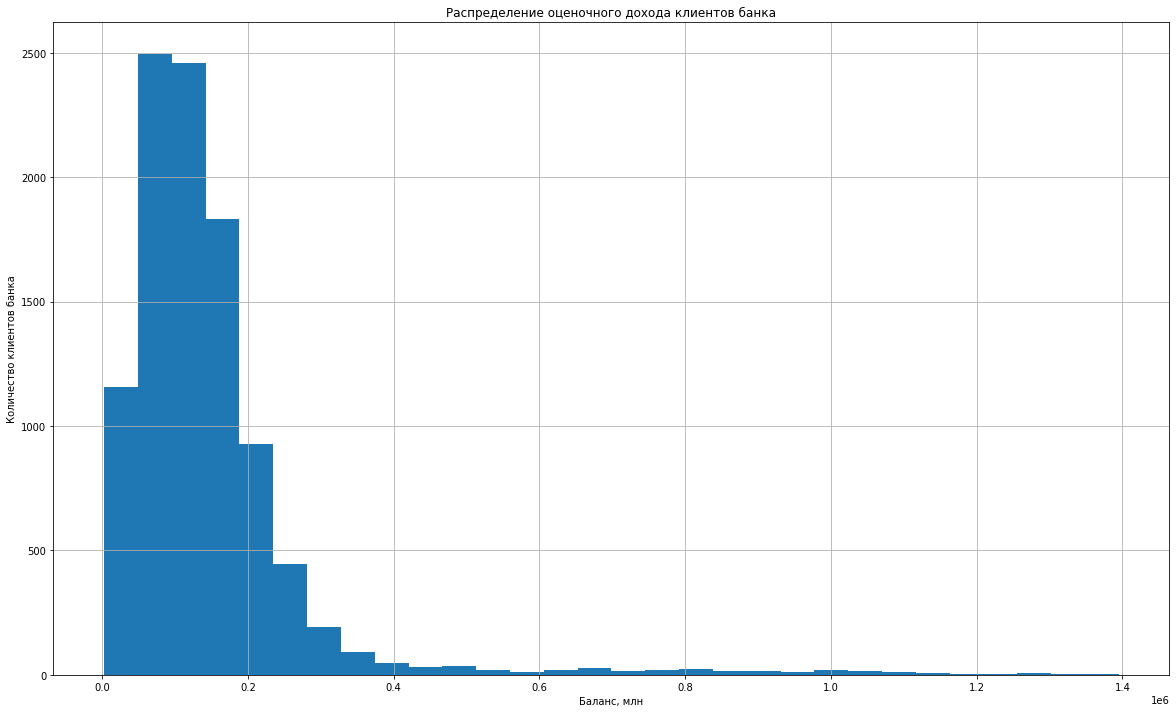

In [43]:
# построим гистограмму оценочного дохода клиентов банка
df['est_salary'].plot(kind='hist', bins=30, figsize=(20, 12), grid=True)
plt.title('Распределение оценочного дохода клиентов банка')
plt.xlabel('Баланс, млн')
plt.ylabel('Количество клиентов банка')
plt.show()

Здесь конечно не такой длинный хвост как в столбце с балансом, но всё же не особо понятно какой оценочный доход клиента чаще всего имеют клиенты банка. Основная масса клиентов находится от 0 до примерно 300000 рублей. Также как и с балансом посчитаем выбросы через межквартильный размах

In [44]:
# вводим значение межквартильного размаха
q1 = df['est_salary'].quantile(.25)
q3 = df['est_salary'].quantile(.75)
iqr = q3 - q1
# ищем максимальное значение межквартильного размаха от третьего квартиля (Q3)
print(q3 + 1.5 * iqr)

323372.04125


Без копеек получим 323372 рубля

In [45]:
# удалим клиентов банка с оценочным доходом свыше 323372 рубля (удаляем не из датафрейма, а только для построения гистограммы)
users_est_salary = df.query('est_salary < 323372')

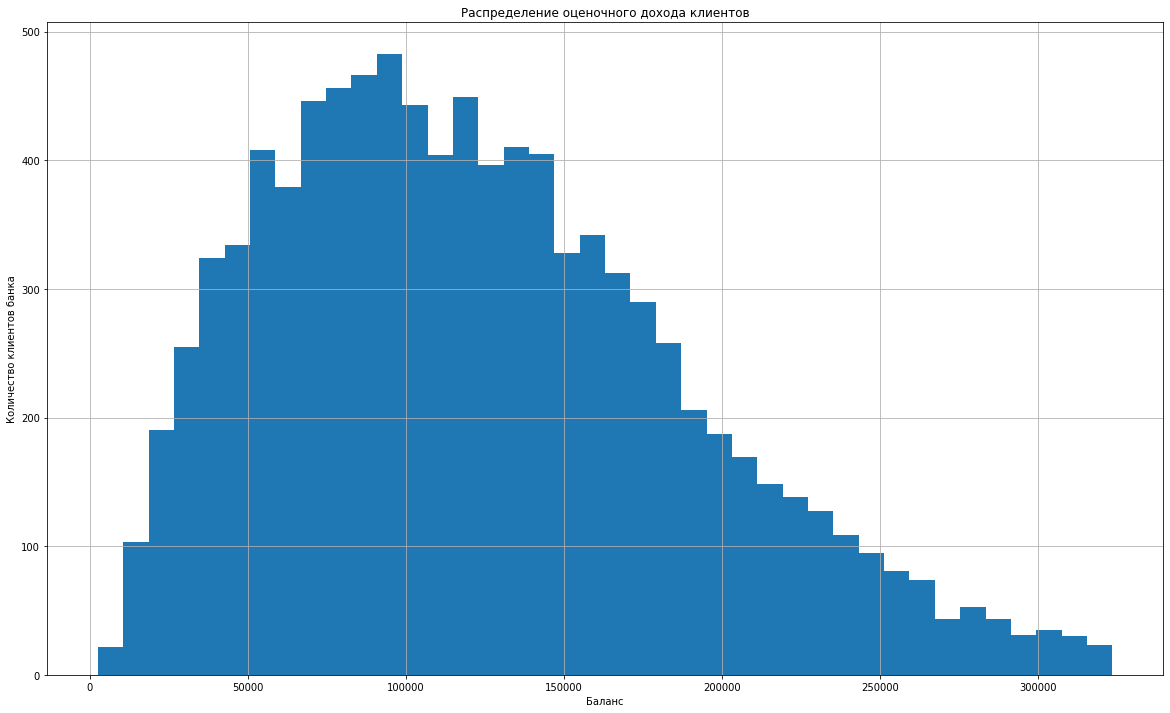

In [46]:
# строим гистограмму
users_est_salary['est_salary'].plot(kind='hist', bins=40, figsize=(20, 12), grid=True)
plt.title('Распределение оценочного дохода клиентов')
plt.xlabel('Баланс')
plt.ylabel('Количество клиентов банка')
plt.show()

Пик приходится на сумму около 100000 рублей, а основная масса клиентов находится в диапазоне от 50000 до 150000 рублей

#### Посмотрим на распределение признака оттока клиентов

In [47]:
# создадим сводную таблицу по оттоку клиентов банка
users_churn = df.pivot_table(index='churn', values='user_id', aggfunc='count'
                                     ).sort_values(by='user_id', ascending=False)
users_churn

,user_id
churn,
0,8155
1,1819


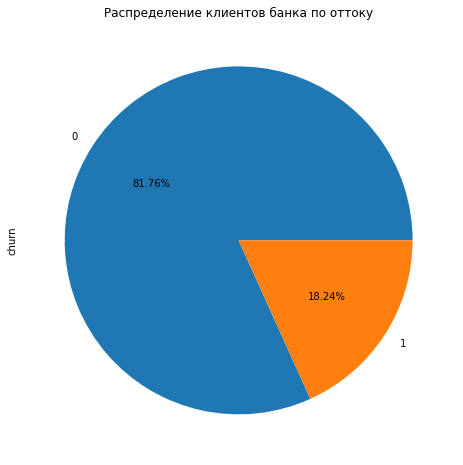

In [48]:
# посмотрим на распределение клиентов банка по оттоку
df['churn'].value_counts().plot(
    kind = 'pie',
    autopct = '%1.2f%%',
    figsize=(8,8), 
    title = 'Распределение клиентов банка по оттоку');

Больше 80% клиентов не имеют признака оттока, а именно 8155 клиентов. 1819 клиентов банка имеют признак оттока (18,24%)

#### Вывод на основании исследования распределений признаков

Мы получили портрет среднестатистического клиента банка:
- 790-920 имеет баллов кредитного скоринга
- с вероятностью 58,9% из Ярославля
- пол не важен, распределение равномерное
- в возрасте от 31 до 43 лет
- имеют баллов собственности от 0 до 5
- имеют баланс от 200000 до 400000 рублей
- пользуются двумя или одним продуктом банка
- 68% клиентов банка имеют кредитную карту
- чуть больше 52% активных клиентов
- имеют оценочных доход в размере от 50000 до 150000 рублей
- средний отток клиентов составляет чуть больше 18%

### Исследование распределений признаков в разрезе оттока клиентов банка

Для дальнейшего упрощения по многим столбцам чтобы постоянно не создавать сводные таблицы будем использовать функцию расчета долей параметров

In [49]:
# создаём функцию расчета долей параметров
def parameter_percent(column):
    parameter = []
    parameter = df.pivot_table (index=column, values='churn', aggfunc=['sum', 'count'])
    parameter.columns = parameter.columns.droplevel(level=1)
    parameter['percent'] = round(parameter['sum']/parameter['count']*100, 2)
    return parameter.sort_values(by='percent', ascending=False)

#### Распределение баллов скоринга в разрезе оттока клиентов

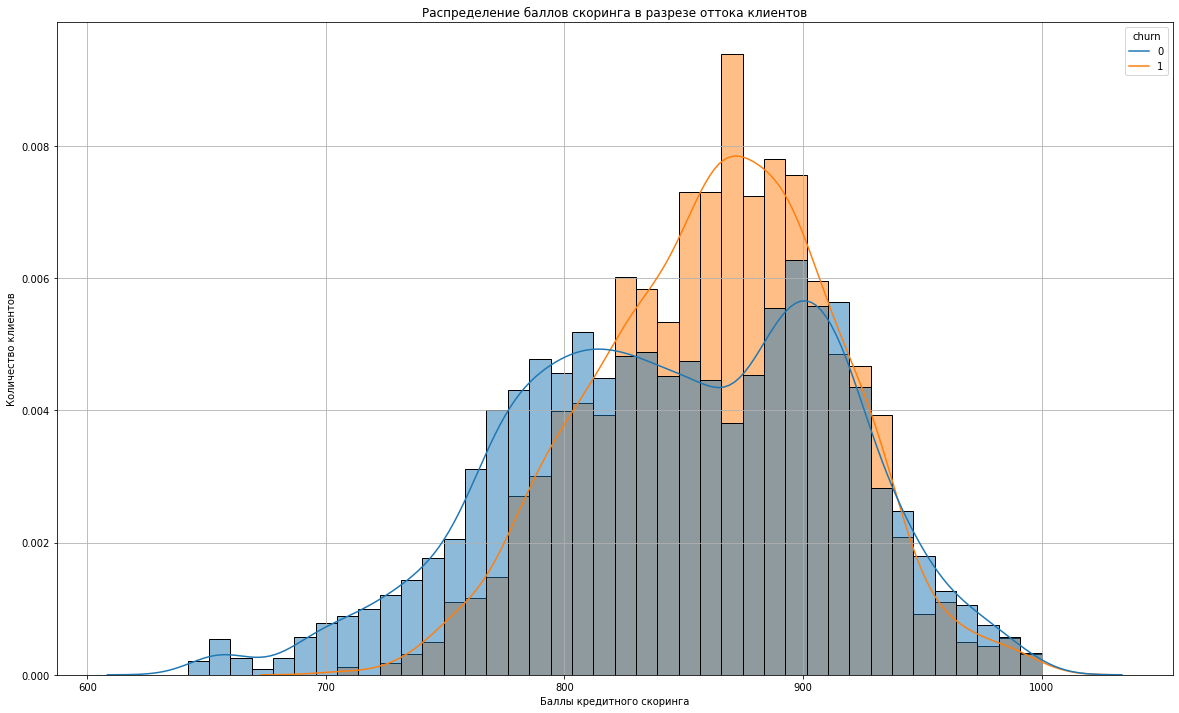

In [50]:
# зададим размер гистограммы
plt.figure(figsize=(20, 12))
# построим гистограмму по баллам кредитного скоринга в разрезе оттока клиентов
sns.histplot(x='score', data=df, stat="density", common_norm=False, hue='churn', alpha=0.5)
sns.kdeplot(x='score', data=df, hue='churn', common_norm=False)
plt.title('Распределение баллов скоринга в разрезе оттока клиентов')
plt.ylabel('Количество клиентов')
plt.xlabel('Баллы кредитного скоринга')
plt.grid(True)
plt.show()

На гистограмме мы видим, что наибольший отток клиентов банка начинается примерно с 820 баллов и заканчивается на 910. Также есть небольшие вплески оттока на 930 и 940 баллах

#### Распределение клиентов банка по городам в разрезе оттока клиентов

In [51]:
# посмотрим на процентное соотношение клиентов банка по городам в разрезе оттока
parameter_percent('city')

,sum,count,percent
city,,,
Ярославль,1117,5875,19.01
Ростов,265,1416,18.71
Рыбинск,437,2683,16.29


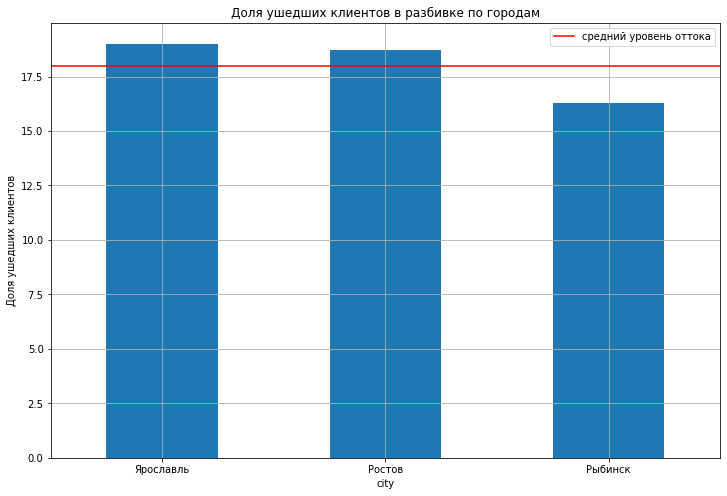

In [52]:
parameter_percent('city')['percent'].plot(kind='bar',
                                     title = 'Доля ушедших клиентов в разбивке по городам',
                                     xlabel = 'city', 
                                     ylabel = 'Доля ушедших клиентов', 
                                     figsize=(12, 8),
                                     ).axhline(parameter_percent('city')['percent'].mean(), c='red')
plt.legend(labels=['средний уровень оттока'])
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Как мы видим в целом отток по городам не сильно различается. В Ярославле и Ростове уровень немного выше чем в среднем - 19,01% и 18,71% соответственно. Только в Рыбинске уровень оттока меньше среднего по датафрейму - 18,24% и составляет 16,29%

#### Распределение клиентов банка по полу в разрезе оттока клиентов

In [53]:
# посмотрим на процентное соотношение клиентов банка по полу в разрезе оттока
parameter_percent('gender')

,sum,count,percent
gender,,,
1,1183,4991,23.70
0,636,4983,12.76


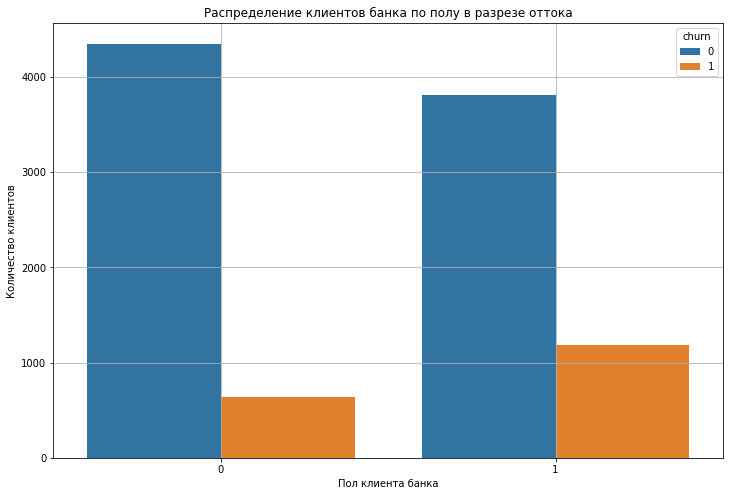

In [54]:
# зададим размер столбчатой диаграммы
plt.figure(figsize=(12, 8))
# создадим столбчатую диаграмму клиентов банка по полу в разрезе оттока
sns.countplot(data=df, x=df['gender'], hue='churn')
plt.title('Распределение клиентов банка по полу в разрезе оттока')
plt.ylabel('Количество клиентов')
plt.xlabel('Пол клиента банка')
plt.grid(True)
plt.show()

Мужчины почти в 2 раза чаще имеют признак оттока, чем женщины. Учитывая, что их в целом одинаковое количество

#### Распределение клиентов банка по возрасту в разрезе оттока клиентов

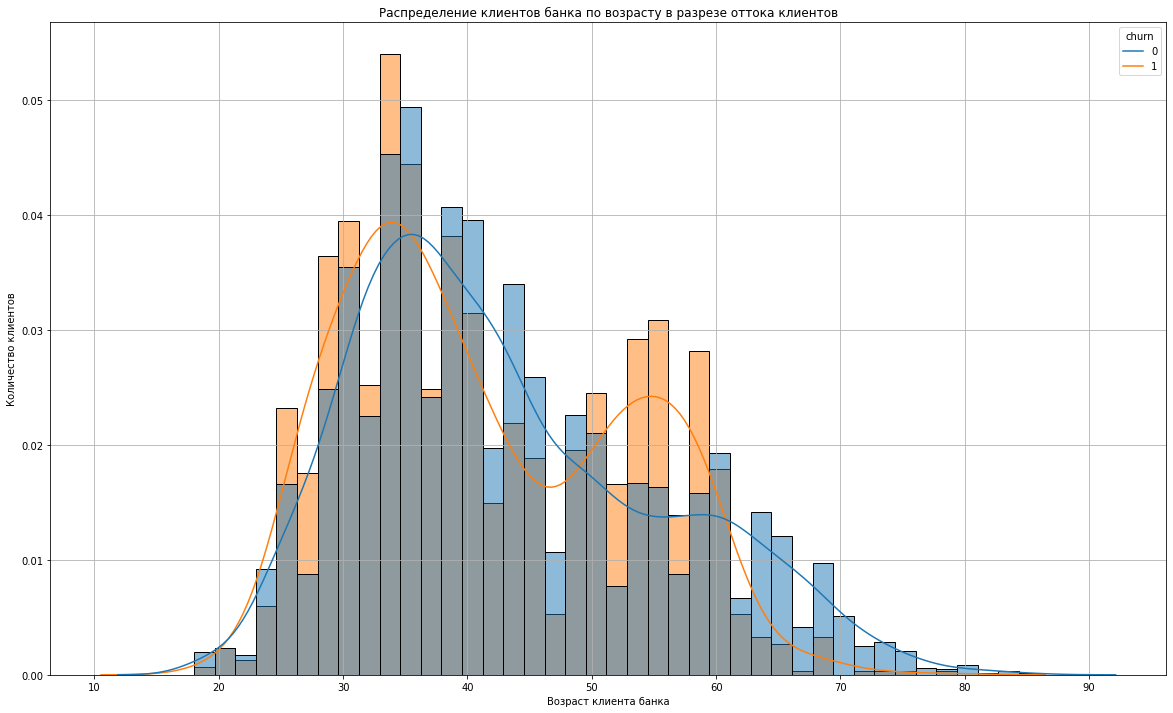

In [55]:
# зададим размер гистограммы
plt.figure(figsize=(20, 12))
# построим гистограмму по возрасту в разрезе оттока клиентов
sns.histplot(x='age', data=df, stat="density", common_norm=False, hue='churn', alpha=0.5)
sns.kdeplot(x='age', data=df, hue='churn', common_norm=False)
plt.title('Распределение клиентов банка по возрасту в разрезе оттока клиентов')
plt.ylabel('Количество клиентов')
plt.xlabel('Возраст клиента банка')
plt.grid(True)
plt.show()

На гистограмме мы видим 2 группы где отток клиентов банка по возрасту выше обычного. 1 группа не столь заметная находится в возрастном диапазоне от 25 до 35 лет. 2 группа где уже гораздо больше отток находится в возрастном диапазоне от 50 до 60 лет

#### Распределение клиентов банка по количеству баллов собственности в разрезе оттока клиентов

In [56]:
# посмотрим на процентное соотношение клиентов банка по количеству баллов собственности в разрезе оттока
parameter_percent('equity').T

equity,9,7,6,8,5,4,3,2,1,0
sum,7.00,37.00,58.00,6.00,576.00,464.00,322.0,166.00,93.00,90.00
count,13.00,80.00,161.00,17.00,1915.00,1847.00,1541.0,1051.00,773.00,2576.00
percent,53.85,46.25,36.02,35.29,30.08,25.12,20.9,15.79,12.03,3.49


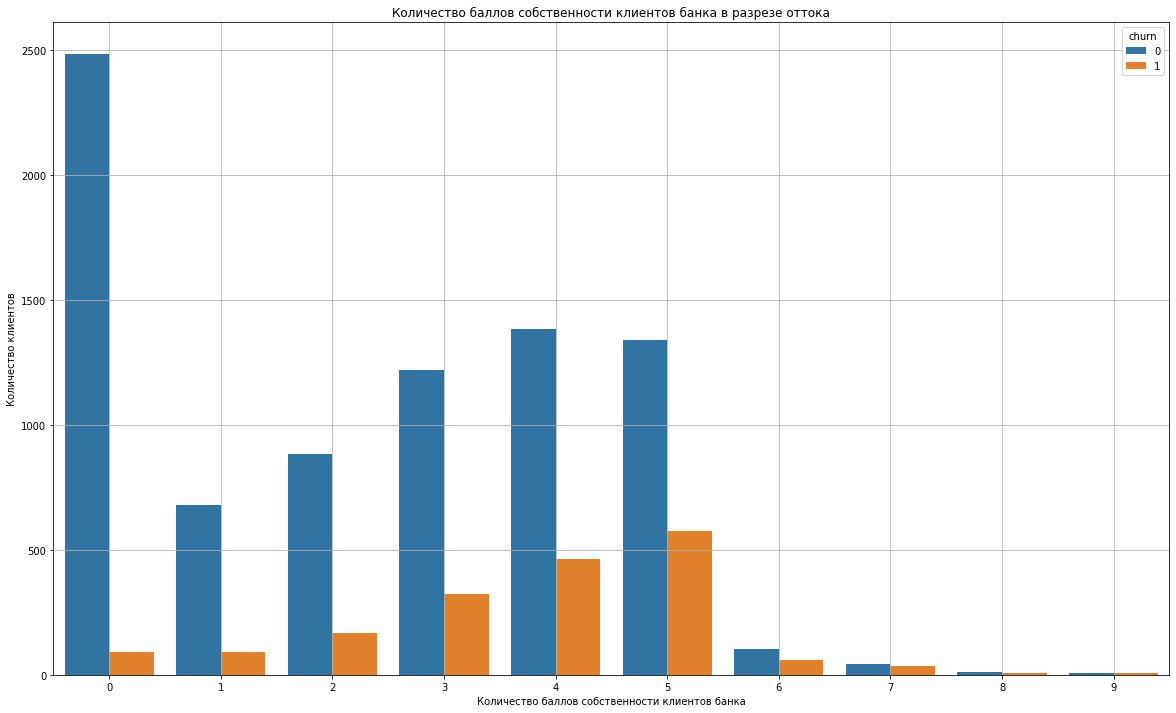

In [57]:
# зададим размер столбчатой диаграммы
plt.figure(figsize=(20, 12))
# создадим столбчатую диаграмму количества баллов собственности клиентов банка в разрезе оттока
sns.countplot(data=df, x=df['equity'], hue='churn')
plt.title('Количество баллов собственности клиентов банка в разрезе оттока')
plt.ylabel('Количество клиентов')
plt.xlabel('Количество баллов собственности клиентов банка')
plt.grid(True)
plt.show()

Согласно таблице (на гистограмме это к сожалению не видно) больше всего отток клиентов банка среди тех, у кого количество баллов собственности равно 9, таких 53,85%. В целом можно заметить тенденцию к возрастанию оттока клиентов по мере увеличения количества баллов собственности

#### Распределение клиентов банка по балансу в разрезе оттока клиентов

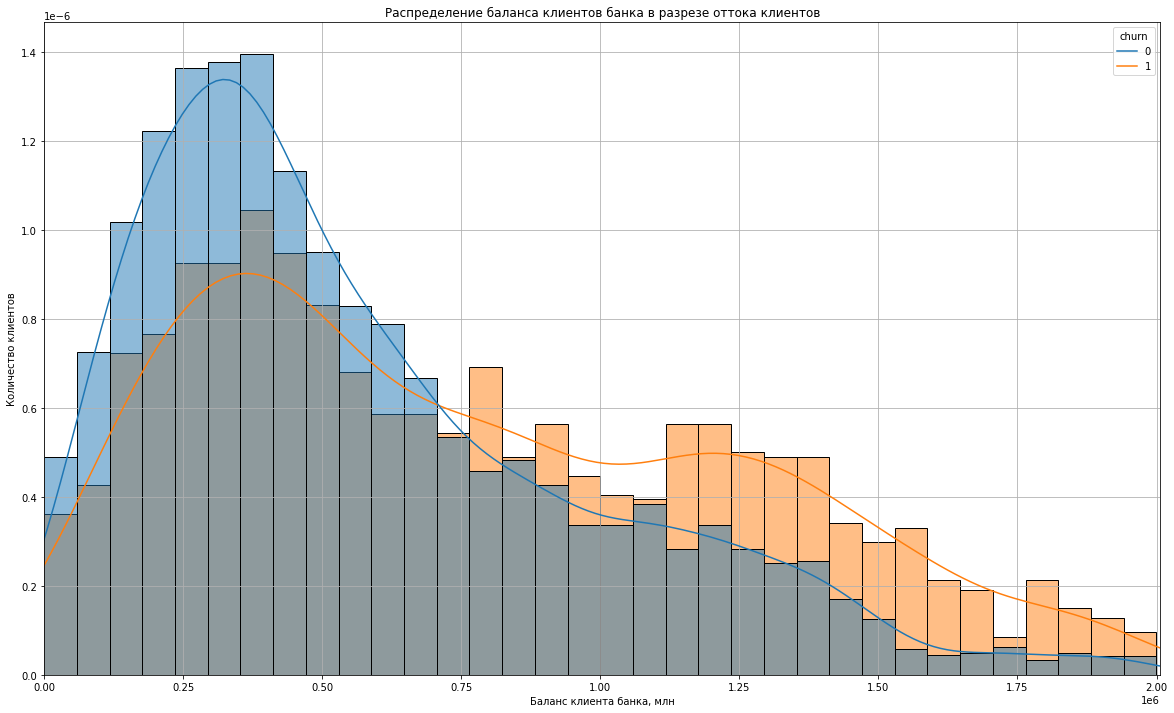

In [58]:
# зададим размер гистограммы
plt.figure(figsize=(20, 12))
# построим гистограмму клиентов банка по балансу в разрезе оттока клиентов
sns.histplot(x='balance', data=users_balance, stat="density", common_norm=False, hue='churn', alpha=0.5)
sns.kdeplot(x='balance', data=users_balance, hue='churn', common_norm=False)
plt.title('Распределение баланса клиентов банка в разрезе оттока клиентов')
plt.ylabel('Количество клиентов')
plt.xlabel('Баланс клиента банка, млн')
plt.xlim(0, 2006580)
plt.grid(True)
plt.show()

Отток клиентов банка наибольший наблюдается при балансе клиентов банка от 0,75 млн рублей и происходит до более 2 млн рублей

#### Распределение клиентов банка по количеству продуктов в разрезе оттока клиентов

In [59]:
# посмотрим на процентное соотношение клиентов банка по количеству продуктов в разрезе оттока
parameter_percent('products').T

products,0,4,5,3,2,1
sum,1.0,300.00,8.00,297.00,978.00,235.00
count,1.0,474.00,19.00,1038.00,5119.00,3323.00
percent,100.0,63.29,42.11,28.61,19.11,7.07


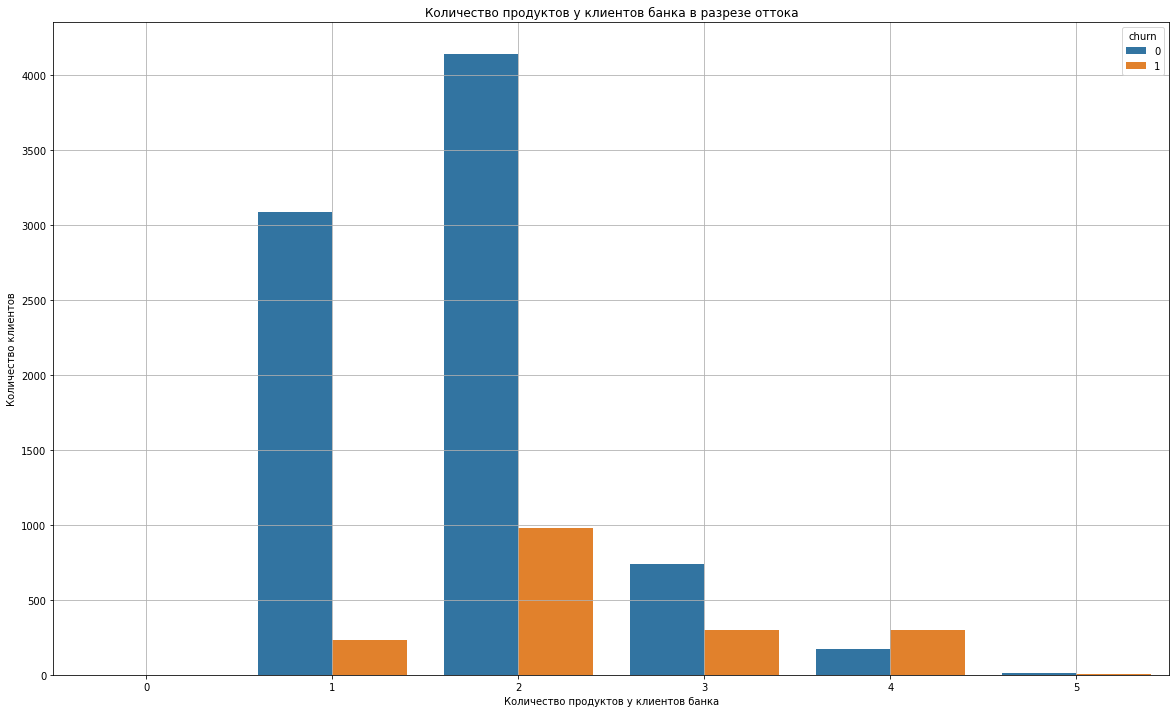

In [60]:
# зададим размер столбчатой диаграммы
plt.figure(figsize=(20, 12))
# создадим столбчатую диаграмму количетсва продуктов у клиентов банка в разрезе оттока
sns.countplot(data=df, x=df['products'], hue='churn')
plt.title('Количество продуктов у клиентов банка в разрезе оттока')
plt.ylabel('Количество клиентов')
plt.xlabel('Количество продуктов у клиентов банка')
plt.grid(True)
plt.show()

Больше всего отток у клиента банка у которого нет продукта банка) Как бы это не парадоксально звучало). Скорее всего этот один клиент начал оформлять заявку на какой-либо продукт банка, но в процессе передумал. Сотрудники банка в свою очередь связались с этим клиентом и предложили ему дооформить заявку, но получили отказ. Из-за этого скорее всего он и попал в отточных клиентов. Его здесь не будем брать в расчёт. Самые отточные клиенты банка те у кого 4 продукта. Их 63,29% от всех клиентов банка у кого 4 продукта (это видно даже на гистограмме), но и 3 продукта тоже отток большой, почти 29%. В целом здесь тоже заметна тенденция, что при увеличинии количества продуктов банка, растёт и процент оттока в каждой группе

#### Распределение клиентов банка по наличию кредитной карты в разрезе оттока клиентов

In [61]:
# посмотрим на процентное соотношение клиентов банка на наличие кредитной карты в разрезе оттока
parameter_percent('credit_card')

,sum,count,percent
credit_card,,,
0,816,3190,25.58
1,1003,6784,14.78


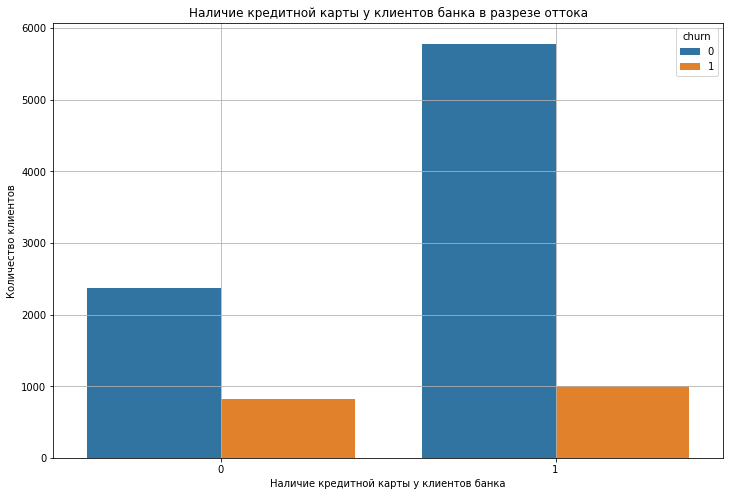

In [62]:
# зададим размер столбчатой диаграммы
plt.figure(figsize=(12, 8))
# создадим столбчатую диаграмму наличия кредитной карты у клиентов банка в разрезе оттока
sns.countplot(data=df, x=df['credit_card'], hue='churn')
plt.title('Наличие кредитной карты у клиентов банка в разрезе оттока')
plt.ylabel('Количество клиентов')
plt.xlabel('Наличие кредитной карты у клиентов банка')
plt.grid(True)
plt.show()

Процент оттока клиентов которые не имеют кредитной карты выше чем у тех кто имеет. Скорее всего условия кредитной карты очень хороши учитывая, что наличие кредитной карты у клиентов банка в 2 раза больше чем у тех кто не имеет кредитку.

#### Распределение активных и неактивных клиентов банка в разрезе оттока клиентов

In [63]:
# посмотрим на процентное соотношение аткивных и неактивных клиентов банка в разрезе оттока
parameter_percent('last_activity')

,sum,count,percent
last_activity,,,
1,1277,5215,24.49
0,542,4759,11.39


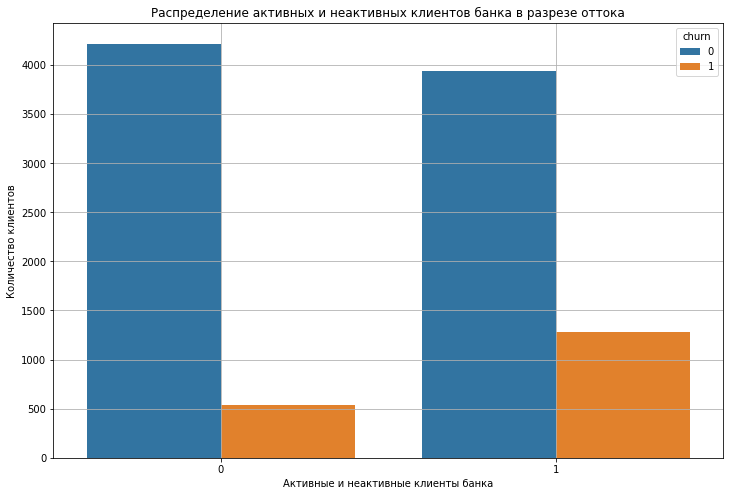

In [64]:
# зададим размер столбчатой диаграммы
plt.figure(figsize=(12, 8))
# создадим столбчатую диаграмму активных и неактивных клиентов банка в разрезе оттока
sns.countplot(data=df, x=df['last_activity'], hue='churn')
plt.title('Распределение активных и неактивных клиентов банка в разрезе оттока')
plt.ylabel('Количество клиентов')
plt.xlabel('Активные и неактивные клиенты банка')
plt.grid(True)
plt.show()

Отток среди активных клиентов банка больше чем в 2 раза выше нежели у неактивных клиентов. Отток активных 24.49%, а не активных 11,39%. Причём стоит заметить, что их количество примерно равное, активных в целом немного больше клиентов банка чем неактивных

#### Распределение оценочных доходов клиентов банка в разрезе оттока клиентов

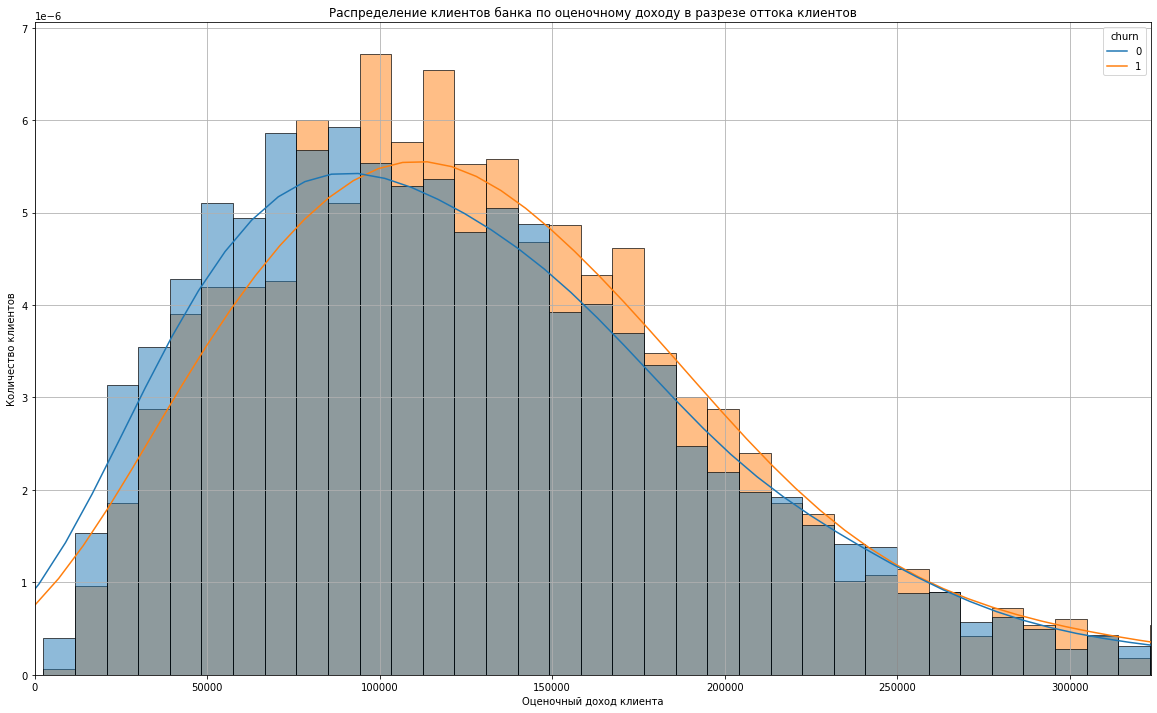

In [65]:
# зададим размер гистограммы
plt.figure(figsize=(20, 12))
# построим гистограмму клиентов банка по оценочному доходу в разрезе оттока клиентов
sns.histplot(x='est_salary', data=df, stat="density", common_norm=False, hue='churn', alpha=0.5)
sns.kdeplot(x='est_salary', data=df, hue='churn', common_norm=False)
plt.title('Распределение клиентов банка по оценочному доходу в разрезе оттока клиентов')
plt.ylabel('Количество клиентов')
plt.xlabel('Оценочный доход клиента')
plt.xlim(0, 323372)
plt.grid(True)
plt.show()

По гистограмме можем заметить, что отток клиентов банка значительно увеличивается как только оценочных доход их переваливает за 100000 рублей. Далее он совсем по чуть-чуть идёт на спад и в районе 250000 рублей становится приимерно равным среди отточных и не отточных клиентов

#### Выводы на основании исследования распределения признаков в разрезе оттока клиентов банка

Мы получили среднестатистический портрет отточного клиента банка:
- 820-910 имеет баллов кредитного скоринга
- город особо не влияет на отток
- мужчины чаще чем женщины
- в возрасте от 25 до 35 лет или от 50 до 60 лет
- имеют баллов собственности от 6 до 9
- имеют баланс от 750000 рублей
- пользуются от 3 до 5 продуктами банка
- не имеет кредитной карты
- скорее всего активный клиент, т.к. почти каждый 4 активный клиент - это отточный клиент банка
- имеют оценочных доход в размере от 100000 до 250000 рублей

### Корреляционный анализ

Перед тем как строить матрицу корреляции удалим 4 столбца, которые в целом нам не нужны. Допустим столбец с 'user_id' имеет всего лишь номер клиента банка и никак ни может коррелировать с другими столбцами. Также 3 столбца с наименованием городов можно исключить, т.к. корреляция с другими столбцами близка к нулю, т.е. она отсутствует (не берём в расчёт корреляцию с 'city' и корреляцию между городами)

In [66]:
# удалим столбцы
df_corr = df.drop(['user_id', 'Ярославль', 'Рыбинск', 'Ростов'], axis=1)

In [67]:
# посмотрим матрицу корреляции по всей нашей таблице
df_corr.phik_matrix(interval_cols=['score', 'age', 'balance', 'est_salary'])

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
score,1.000000,0.090564,0.070361,0.032750,0.527316,0.170884,0.308312,0.208120,0.051763,0.394935,0.229475
city,0.090564,1.000000,0.011924,0.091769,0.062559,0.039931,0.223196,0.074660,0.030399,0.170881,0.016431
gender,0.070361,0.011924,1.000000,0.286450,0.063699,0.045434,0.122023,0.195831,0.012733,0.144177,0.219731
age,0.032750,0.091769,0.286450,1.000000,0.046514,0.019169,0.133230,0.157632,0.090068,0.359738,0.191653
equity,0.527316,0.062559,0.063699,0.046514,1.000000,0.000000,0.441413,0.221467,0.051218,0.285580,0.352103
balance,0.170884,0.039931,0.045434,0.019169,0.000000,1.000000,0.000000,0.000000,0.000000,0.374367,0.024672
products,0.308312,0.223196,0.122023,0.133230,0.441413,0.000000,1.000000,0.459117,0.191921,0.157374,0.440923
credit_card,0.208120,0.074660,0.195831,0.157632,0.221467,0.000000,0.459117,1.000000,0.049306,0.038441,0.202374
last_activity,0.051763,0.030399,0.012733,0.090068,0.051218,0.000000,0.191921,0.049306,1.000000,0.044857,0.262164
est_salary,0.394935,0.170881,0.144177,0.359738,0.285580,0.374367,0.157374,0.038441,0.044857,1.000000,0.048829


Строим тепловую карту

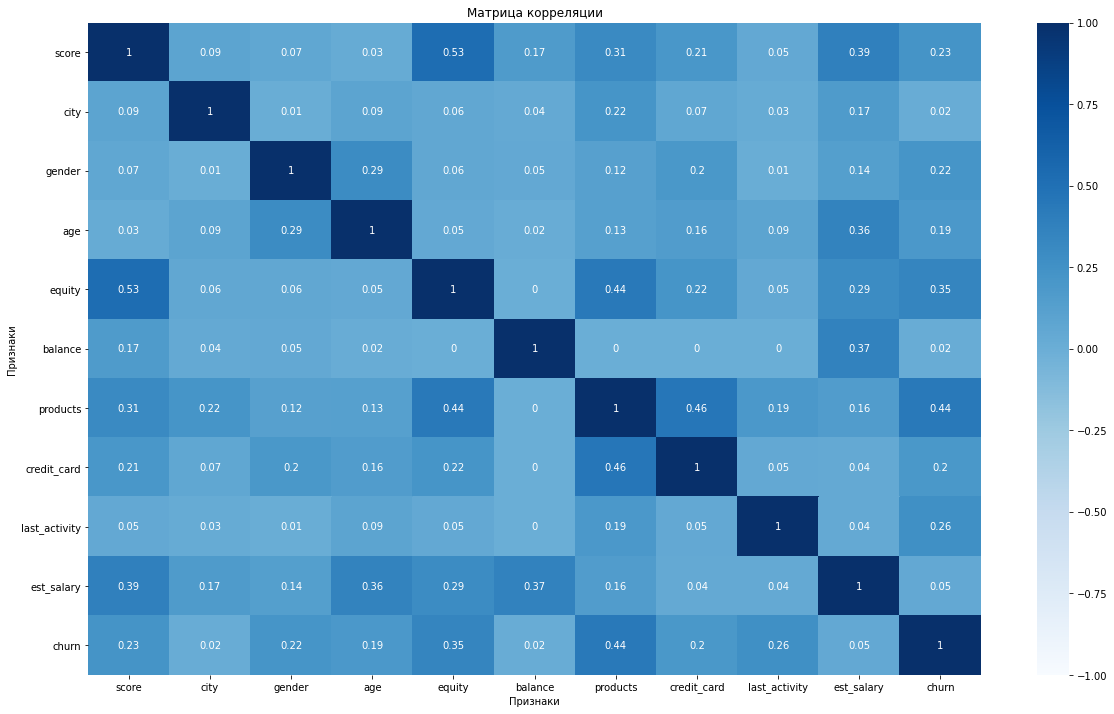

In [68]:
# укажем размер графика корреляции
plt.figure(figsize=(20, 12))
# построим тепловую карту
sns.heatmap(df_corr.phik_matrix(interval_cols=['score', 'age', 'balance', 'est_salary']).round(2),
            vmin=-1, vmax=1, annot=True, cmap='Blues', linecolor='black') 
plt.title('Матрица корреляции')
plt.xlabel('Признаки')
plt.ylabel('Признаки')
plt.show();

При оценке силы связи коэффициентов корреляции используется шкала Чеддока:
- от 0 до 0,1 – корреляции нет
- от 0,1 до 0,3 – слабая
- от 0,3 до 0,5 – умеренная
- от 0,5 до 0,7 – заметная
- от 0,7 до 0,9 – высокая
- от 0,9 до 1 – очень высокая

Запишем только 2 группы согласно шкале Чеддока:
- заметная корреляция (0,5 - 0,7)
    - 0,53 - между баллами кредитного скоринга и количеством баллов собственности
- умеренная корреляция (0,3 - 0,5)
    - 0,46 - между количеством продуктов и наличием кредитной карты
    - 0,44 - между количеством баллов собственности и количеством продуктов
    - 0,44 - между количеством продуктов и оттоком
    - 0,39 - между баллами кредитного скоринга и оценочным доходом клиента
    - 0,37 - между балансом и оценочным доходом клиента
    - 0,36 - между возрастом и оценочным доходом клиента
    - 0,35 - между количеством баллов собственности и оттоком
    - 0,31 - между баллами кредитного скоринга и количеством продуктов

Это 9 самых больших коэффициента корреляции в нашей матрице. Ниже уже не будем даже писать

Также для презентации создадим матрицу корреляции по оттоку клиентов

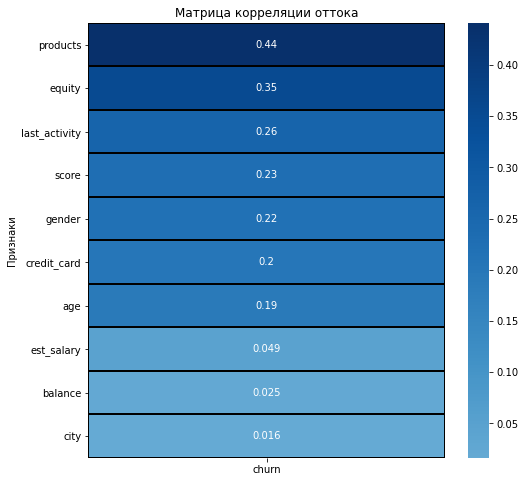

In [69]:
# укажем размер графика корреляции
plt.figure(figsize=(8, 8))
# построим тепловую карту для признака оттока
sns.heatmap(df_corr.phik_matrix(interval_cols=['score', 'age', 'balance', 'est_salary']).loc[:,['churn']]
            .drop('churn').sort_values('churn', ascending=False),
            annot=True, cmap='Blues',center=0, linecolor='black', linewidths=1)
plt.title('Матрица корреляции оттока')
plt.ylabel('Признаки')
plt.show();

На этой матрице корреляции оттока заметна:
- умеренная корреляция (0,3 - 0,5)
    - 0,44 - оттока с количеством продуктов
    - 0,35 - оттока с количеством баллов собственности
- слабая корреляция (0,1 - 0,3)
    - 0,26 - оттока с активностью клиента
    - 0,23 - оттока с баллами кредитного скоринга
    - 0,22 - оттока с полом клиента
    - 0,20 - оттока с наличием кредитной карты
    - 0,19 - оттока с возрастом
- по остальным признакам корреляции с оттоком нет

## Проверка гипотез

На основании исследовательского анализа оттока и матриц корреляций проверим несколько гипотез:
- по гистограмме оценочного дохода клиентов в разрезе оттока видно, что как только оценочный доход переваливает за 100000 рублей, то отток увеличивается, но матрица корреляции оттока говорит об обратном, что корреляция между оценочным доходом клиента и оттоком практически нулевая
- по гистограмме баланса клиентов в разрезе оттока видно, что как только баланс доходит до 1 млн, то отток увеличивается, но матрица корреляции оттока говорит об обратном, что корреляция между балансом клиента и оттоком практически нулевая

Так как во всех трёх гипотезах мы рассматриваем 2 независимые выборки (независимые они друг от друга, т.к. клиент не может быть отточным и неооточным одновременно), то выберем проверки гипотез о равенстве средних двух генеральных совокупностей.

Для того чтобы всё же понять можем ли мы применять t-тест, необходимо проверить в каждой гипотезе 3 условия:
- генеральные совокупности не зависят друг от друга
- выборочные средние нормально распределены
- дисперсии рассматриваемых генеральных совокупностей равны

### Гипотеза №1

Проверим гипотезу

H_0: cредний оценочный доход оставшихся клиентов банка = среднему оценочному доходу отточных клиентов банка

H_1: cредний оценочный доход оставшихся клиентов банка ≠ среднему оценочному доходу отточных клиентов банка

alpha = 0.05

Проверим 3 условия в гипотезе №1:
- мы уже сказали, что генеральные совокупности не зависят друг от друга
- проверим нормально ли распределены выборочные средние
- т.к. мы не знаем равны ли дисперсии или нет, укажем в 'equal_var' значение 'False'

Значит проверяем только нормально ли распределены выборочные средние

In [70]:
# создадим переменные для проверки
est_salary_churn_0 = df.query('churn == 0')['est_salary']
est_salary_churn_1 = df.query('churn == 1')['est_salary']

alpha = 0.05

shapiro_test_stat, p_value = st.shapiro(est_salary_churn_0)

print('p-значение:', p_value)
if p_value < alpha:
    print('Не нормальное распределение для оставшихся клиентов')
else:
    print('Нормальное распределение для оставшихся клиентов')
    
shapiro_test_stat, p_value = st.shapiro(est_salary_churn_1)
print('p-значение:', p_value)
if p_value < alpha:
    print('Не нормальное распределение для отточных клиентов')
else:
    print('Нормальное распределение для отточных клиентов')

p-значение: 0.0
Не нормальное распределение для оставшихся клиентов
p-значение: 0.0
Не нормальное распределение для отточных клиентов


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [71]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(est_salary_churn_0, est_salary_churn_1, equal_var=False)

# уровень статической значимости
alpha = 0.05

# вывод значения p-value
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')
    
    
print('В среднем оценочный доход оставшихся клиентов составляет', est_salary_churn_0.mean().round(2), 'рублей')
print('В среднем оценочный доход отточных клиентов составляет', est_salary_churn_1.mean().round(2), 'рублей')

p-значение: 0.8515799588935961
Не удалось отвергнуть нулевую гипотезу
В среднем оценочный доход оставшихся клиентов составляет 147674.64 рублей
В среднем оценочный доход отточных клиентов составляет 148289.7 рублей


Вывод: не удалось отвергнуть H_0, а это значит, что нет существенной разницы между оценочным доходом оставшегося клиента и отточного. Их средний оценочный доход равен

### Гипотеза №2

Проверим гипотезу

H_0: cредний баланс оставшихся клиентов банка = среднему балансу отточных клиентов банка

H_1: cредний баланс оставшихся клиентов банка ≠ среднему балансу отточных клиентов банка

alpha = 0.05

Проверим 3 условия в гипотезе №2:
- мы уже сказали, что генеральные совокупности не зависят друг от друга
- проверим нормально ли распределены выборочные средние
- т.к. мы не знаем равны ли дисперсии или нет, укажем в 'equal_var' значение 'False'

Значит проверяем только нормально ли распределены выборочные средние

Перед тем как начать проверку данной гипотезы нам необходимо решить, что делать с пропусками в столбце с балансом. Прировнять все пропуски к 0 будет не правильно с точки зрения, что больше 2000 клиентов с балансом 0 могут существенно повлиять на проверку данной гипотезы. Значит будем удалять пропуски в стоблце с балансом

In [72]:
# создадим отдельный датафрейм чисто для проверки гипотезы в котором удалим все пропуски в столбце с балансом
df_hyp = df.dropna(subset=['balance'])

In [73]:
# создадим переменные для проверки
balance_churn_0 = df_hyp.query('churn == 0')['balance']
balance_churn_1 = df_hyp.query('churn == 1')['balance']

alpha = 0.05

shapiro_test_stat, p_value = st.shapiro(balance_churn_0)

print('p-значение:', p_value)
if p_value < alpha:
    print('Не нормальное распределение для оставшихся клиентов')
else:
    print('Нормальное распределение для оставшихся клиентов')
    
shapiro_test_stat, p_value = st.shapiro(balance_churn_1)
print('p-значение:', p_value)
if p_value < alpha:
    print('Не нормальное распределение для отточных клиентов')
else:
    print('Нормальное распределение для отточных клиентов')

p-значение: 0.0
Не нормальное распределение для оставшихся клиентов
p-значение: 0.0
Не нормальное распределение для отточных клиентов


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [74]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(balance_churn_0, balance_churn_1, equal_var=False)

# уровень статической значимости
alpha = 0.05

# вывод значения p-value
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')
    
    
print('В среднем баланс оставшихся клиентов составляет', balance_churn_0.mean().round(2), 'рублей')
print('В среднем баланс отточных клиентов составляет', balance_churn_1.mean().round(2), 'рублей')

p-значение: 1.7317408579113568e-13
Отвергаем нулевую гипотезу
В среднем баланс оставшихся клиентов составляет 733031.63 рублей
В среднем баланс отточных клиентов составляет 1134458.21 рублей


Вывод: отвергаем H_0, потому-что есть существенная разница в балансе между отсавшимися и отточными клиентами банка

### Гипотеза №3

Проверим гипотезу различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним

H_0: средний возраст клиентов банка которые пользуются двумя продуктами банка = среднему возрасту клиентов банка которые пользуются одним продуктом банка

H_1: средний возраст клиентов банка которые пользуются двумя продуктами банка ≠ среднему возрасту клиентов банка которые пользуются одним продуктом банка

alpha = 0.05

Проверим 3 условия в гипотезе №3:
- мы уже сказали, что генеральные совокупности не зависят друг от друга
- проверим нормально ли распределены выборочные средние
- т.к. мы не знаем равны ли дисперсии или нет, укажем в 'equal_var' значение 'False'

Значит проверяем только нормально ли распределены выборочные средние

In [75]:
# создадим переменные для проверки
age_user_prod_2 = df.query('products == 2')['age']
age_user_prod_1 = df.query('products == 1')['age']

alpha = 0.05

shapiro_test_stat, p_value = st.shapiro(age_user_prod_2)

print('p-значение:', p_value)
if p_value < alpha:
    print('Не нормальное распределение клиентов пользующихся двумя продуктами')
else:
    print('Нормальное распределение клиентов пользующихся двумя продуктами')
    
shapiro_test_stat, p_value = st.shapiro(age_user_prod_1)
print('p-значение:', p_value)
if p_value < alpha:
    print('Не нормальное распределение клиентов пользующихся одним продуктом')
else:
    print('Нормальное распределение клиентов пользующихся одним продуктом')

p-значение: 7.941429186486062e-35
Не нормальное распределение клиентов пользующихся двумя продуктами
p-значение: 2.7809143816725107e-30
Не нормальное распределение клиентов пользующихся одним продуктом


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [76]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(age_user_prod_2, age_user_prod_1, equal_var=False)

# уровень статической значимости
alpha = 0.05

# вывод значения p-value
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')
    
    
print('Средний возраст клиентов банка которые пользуются двумя продуктами составляет', age_user_prod_2.mean().round(2), 'лет')
print('Средний возраст клиентов банка которые пользуются одним продуктом составляет', age_user_prod_1.mean().round(2), 'лет')

p-значение: 0.03299080704232691
Отвергаем нулевую гипотезу
Средний возраст клиентов банка которые пользуются двумя продуктами составляет 42.77 лет
Средний возраст клиентов банка которые пользуются одним продуктом составляет 42.2 лет


Вывод: отвергаем H_0, т.к. средний возраст клиентов банка пользующимися двумя и одним продуктами не равен

## Промежуточный итог

Исходя из исследовательского анализа данных и проверки гипотез можно сделать вывод, что сегментацию пользователей будем делать из следующих признаков:
- баллов кредитного скоринга (820-910)
- пол - мужской
- 2 диапазона возраста:
    - от 25 до 35 лет
    - от 50 до 60 лет
- имеют от 5 и выше баллов собственности
- имеют баланс от 750000 рублей
- пользуются от 3 до 5 продуктами банка
- не имеет кредитной карты
- активный клиент
- оценочных доход в размере от 100000 до 250000 рублей

Не берём признаки по следующим причинам:
- город не имеет большой разницы по оттоку

## Сегментация на основе выделенных показателей

Расположил сегментации в порядке убывания доли отточных клиентов

### Сегмент № 1
- 820-910 баллов кредитного скоринга
- мужчина
- баланс больше 750000 рублей

In [77]:
print('Количество клиентов в сегменте №1:', df.query('820 <= score <= 910 and \
        gender == "1" and balance > 750000')['user_id'].count())
print('Количество отточный клиентов в сегменте №1:', df.query('820 <= score <= 910 and \
        gender == "1" and balance > 750000 and churn == 1')['user_id'].count())
print('Доля отточных клиентов в сегменте №1:',round(df.query('820 <= score <= 910 and \
        gender == "1" and balance > 750000 and churn == 1')
      ['user_id'].count() / df.query('820 <= score <= 910 and \
      gender == "1" and balance > 750000')['user_id'].count() * 100), '%')

Количество клиентов в сегменте №1: 764
Количество отточный клиентов в сегменте №1: 373
Доля отточных клиентов в сегменте №1: 49 %


### Сегмент № 2
- 820-910 баллов скоринга
- имеет количество баллов собственности от 5 и выше
- пользуется 3 и более продуктами

In [78]:
print('Количество клиентов в сегменте №3:', df.query('820 <= score <= 910 and \
        equity >= 5 and products >= 3')['user_id'].count())
print('Количество отточный клиентов в сегменте №3:', df.query('820 <= score <= 910 and \
        equity >= 5 and products >= 3 and churn == 1')['user_id'].count())
print('Доля отточных клиентов в сегменте №3:', round(df.query('820 <= score <= 910 and \
        equity >= 5 and products >= 3 and churn == 1')['user_id'].count() / df.query('820 <= score <= 910 and \
        equity >= 5 and products >= 3')['user_id'].count() * 100), '%')

Количество клиентов в сегменте №3: 311
Количество отточный клиентов в сегменте №3: 150
Доля отточных клиентов в сегменте №3: 48 %


### Сегмент № 3
- мужчина
- возраст 50-60 лет
- не имеет кредитной карты

In [79]:
print('Количество клиентов в сегменте №3:', df.query('gender == "1" and \
        50 <= age <= 60 and credit_card == 0')['user_id'].count())
print('Количество отточный клиентов в сегменте №3:', df.query('gender == "1" and \
        50 <= age <= 60 and credit_card == 0 and churn == 1')['user_id'].count())
print('Доля отточных клиентов в сегменте №3:', round(df.query('gender == "1" and \
        50 <= age <= 60 and credit_card == 0 and churn == 1')['user_id'].count() / df.query('gender == "1" and \
        50 <= age <= 60 and credit_card == 0')['user_id'].count() * 100), '%')

Количество клиентов в сегменте №3: 280
Количество отточный клиентов в сегменте №3: 123
Доля отточных клиентов в сегменте №3: 44 %


### Сегмент № 4
- возраст 25-35 лет
- активный клиент
- оценочный доход 100000-250000 рублей

In [80]:
print('Количество клиентов в сегменте №3:', df.query('25 <= age <= 35 and \
        last_activity == 1 and 100000 <= est_salary <= 250000')['user_id'].count())
print('Количество отточный клиентов в сегменте №3:', df.query('25 <= age <= 35 and \
        last_activity == 1 and 100000 <= est_salary <= 250000 and churn == 1')['user_id'].count())
print('Доля отточных клиентов в сегменте №3:', round(df.query('25 <= age <= 35 and \
        last_activity == 1 and 100000 <= est_salary <= 250000 and churn == 1')
        ['user_id'].count() / df.query('25 <= age <= 35 and last_activity == 1 and \
        100000 <= est_salary <= 250000')['user_id'].count() * 100), '%')

Количество клиентов в сегменте №3: 740
Количество отточный клиентов в сегменте №3: 287
Доля отточных клиентов в сегменте №3: 39 %


## Рекомендации и выводы по проекту

### Рекомендации

#### Сегмент № 1

- использовать пониженные ставки по кредитным продуктам, т.к. на баланс таких клиентов можно выдавать заёмные средства другим клиентам банка которые допустим не имеют такого высокого балла кредитного скоринга
- использовать повышенные ставки по вкладам, накопительным счетам и просто на остаток по дебетовым картам

#### Сегмент № 2
- убрать плату за обслуживание кредитных и дебетовых карт
- предложить повышенные суммы кредитования под допустим залог недвижимости или автомобиля
- поощрать за своевременное внесение платежей по каким-либо кредитным продуктам (так скоринговый балл высокий)

#### Сегмент № 3
- рассказывать о преимуществах использования кредитной карты
- предлагать открыть счёт для будущих пенсионных накоплений
- популизировать интернет-банкинг и мобильное приложение. рассказывать про безопасность данных методов и что не нужно по многим вопросам лично обращаться в отделение банка

#### Сегмент № 4
- предлагать таким клиентам зарплатные проекты
- поощрять путём начисления кэшбэка за оплату картой банка
- также поощрять за реферальную программу "приведу друга"
- предлагать длинный льготный период по кредитным картам и пониженные % по любому виду кредитования

### Выводы по проекту

1. Описание проекта
- добавили наименование и описание проекта
- сделали декомпозицию

2. Открытие файла и изучение ощей информации
- импортировали все нужные библиотеки для исследования
- открыли и изучили датафрейм
- обнаружили пропуски, некорректные наименования и типы данных в столбцах

3. Предобработка данных
- изучили пропуски и удалили некоторое количество
- привели наименования столбцов к единому стилю
- проверили датафрейм на наличие дубликатов
- изменили типы данных в столбцах
- сделали кодирование признаков

4. Исследовательский анализ данных
- провели исследование распределений признаков
- провели исследование распределений признаков в разрезе оттока клиентов банка
- провели корреляционный анализ

5. Проверка гипотез
- cредний оценочный доход оставшихся клиентов банка равен среднему оценочному доходу отточных клиентов банка
    - не удалось отвергнуть нулевую гипотезу
- cредний баланс оставшихся клиентов банка равен среднему балансу отточных клиентов банка
    - отвергли нулевую гипотезу
- средний возраст клиентов банка которые пользуются двумя продуктами банка равен среднему возрасту клиентов банка которые пользуются одним продуктом банка
    - отвергли нулевую гипотезу
    
6. Промежуточный итог
- составили список признаков из которых будем делать сегментацию

7. Сегментация на основе выделенных показателей
- создали 4 сегмента клиентов исходя из выбранных признаков максимально не пересекающихся между собой

8. Выводы и рекомендации
- написали рекомендации на основе выделенных показателей для сегментации

## Материалы:
Презентация: https://disk.yandex.ru/i/cS3293bSaw_FSQ